In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

import seaborn as sns
%matplotlib inline 

In [4]:
mpl.rcParams['toolbar'] = 'None'


In [5]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/combined_all.xlsx')

In [6]:
df.shape

(31665, 12)

In [7]:
df.head()

,CommandName,CenterName,Date,Cause,Location,Overview,total.Humi,total.temp,total.wind,total.rain,total.dew,total.snow
0,119특수구조단(구),항공대,2013010313,일반조난,산기타,현기증 호소하며 특이외상없음. 개인요구조자 벨트 사용하여 헬기로 인양함,34.50,-12.725,3.000,0.0,-23.00,11.250
1,119특수구조단(구),항공대,2013010512,일반조난,산기타,현장도착하여 확인한바 요구조자는 두부열상으로 안전벨트에 결속하여 헬기에 인양후 도봉...,46.25,-5.675,1.775,0.0,-14.65,8.925
2,119특수구조단(구),항공대,2013011617,산악기타,산기타,도봉소방서 옥상으로 환자 이송 후 방학구급대에 인계함,62.25,-2.900,2.475,0.0,-7.35,3.700
3,119특수구조단(구),항공대,2013011911,일반조난,산기타,환자 우측발목통증 부목 고정 후 요구조자 벨트로 헬기 인양 후 도봉소방서 옥상에서 ...,59.50,-0.300,1.800,0.0,-6.00,3.525
4,119특수구조단(구),항공대,2013011912,일반조난,산기타,"12:07분 002호기 출동하여 12:14분 현장도착, 북한산악구조대의 주변 통제로...",55.00,0.700,1.400,0.0,-5.00,3.450


In [8]:
df.columns

Index(['CommandName', 'CenterName', 'Date', 'Cause', 'Location', 'Overview',
       'total.Humi', 'total.temp', 'total.wind', 'total.rain', 'total.dew',
       'total.snow'],
      dtype='object')

In [9]:
weather_col = ['totalHumi','totaltemp', 'totalwind', 'totalrain', 'totaldew', 'totalsnow']
factors = ['Distress','ExternalFactors', 'PersonalIllness']

In [10]:
df.dtypes

CommandName     object
CenterName      object
Date             int64
Cause           object
Location        object
Overview        object
total.Humi     float64
total.temp     float64
total.wind     float64
total.rain     float64
total.dew      float64
total.snow     float64
dtype: object

In [11]:
df.drop(columns=['CommandName','CenterName','Date','Location','Overview'], inplace=True)

In [12]:
df.rename({'total.Humi':'totalhumi','total.temp':'totaltemp','total.wind':'totalwind','total.rain':'totalrain','total.dew':'totaldew','total.snow':'totalsnow'}, inplace=True, axis= 1)



In [13]:
df.head()

,Cause,totalhumi,totaltemp,totalwind,totalrain,totaldew,totalsnow
0,일반조난,34.50,-12.725,3.000,0.0,-23.00,11.250
1,일반조난,46.25,-5.675,1.775,0.0,-14.65,8.925
2,산악기타,62.25,-2.900,2.475,0.0,-7.35,3.700
3,일반조난,59.50,-0.300,1.800,0.0,-6.00,3.525
4,일반조난,55.00,0.700,1.400,0.0,-5.00,3.450


In [14]:
lista = []
for i in df['Cause']:
    lista.append(i)

In [15]:
set(lista)

{'개인질환', '낙석낙빙', '산악기타', '실족추락', '암벽등반', '일반조난', '저체온증', '탈진탈수'}

In [16]:
df1=df['Cause']
df1.head()

0    일반조난
1    일반조난
2    산악기타
3    일반조난
4    일반조난
Name: Cause, dtype: object

In [17]:
# df.plot(kind='bar')
# plt.xlabel('type of accident')

df.head()

,Cause,totalhumi,totaltemp,totalwind,totalrain,totaldew,totalsnow
0,일반조난,34.50,-12.725,3.000,0.0,-23.00,11.250
1,일반조난,46.25,-5.675,1.775,0.0,-14.65,8.925
2,산악기타,62.25,-2.900,2.475,0.0,-7.35,3.700
3,일반조난,59.50,-0.300,1.800,0.0,-6.00,3.525
4,일반조난,55.00,0.700,1.400,0.0,-5.00,3.450


In [18]:
df.groupby(['Cause']).describe()[1:3]

totaldew                                                         \
         count      mean        std    min  25%   50%       75%   max   
Cause                                                                   
낙석낙빙      46.0  5.676087  11.376015 -19.85 -1.6  6.15  12.94375  25.1   
산악기타    8144.0  6.832235  11.320901 -26.30 -1.5  8.50  16.25000  26.7   

      totalhumi             ...  totaltemp        totalwind            \
          count       mean  ...        75%    max     count      mean   
Cause                       ...                                         
낙석낙빙       46.0  49.913043  ...    24.3375  27.85      46.0  2.192935   
산악기타     8144.0  51.409295  ...    23.9000  37.60    8142.0  2.031024   

                                                  
            std  min     25%   50%     75%   max  
Cause                                             
낙석낙빙   0.917903  0.4  1.6125  2.10  2.7875  5.05  
산악기타   0.947345  0.0  1.3250  1.95  2.6000  7.10  

[2 rows x 48 columns]

In [19]:
lists = []
for i in ['산악기타','실족추락','암벽등반','일반조난','저체온증','탈진탈수']:
    lists.append(df.loc[df['Cause']==i].dropna())

In [20]:
#낙석낙빙
df_rock = df.where(df['Cause']=='낙석낙빙').dropna()
# 개인질환
df_ill = df.where(df['Cause']=='개인질환').dropna()
df_etc = lists[0] #산악기타
df_drop = lists[1] #실족추락
df_climb = lists[2] #암벽등반
df_distress = lists[3] #일반조난
df_lowtemp = lists[4] #저체온증
df_exh = lists[5] #탈진탈수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18d94b38>,
      dtype=object)

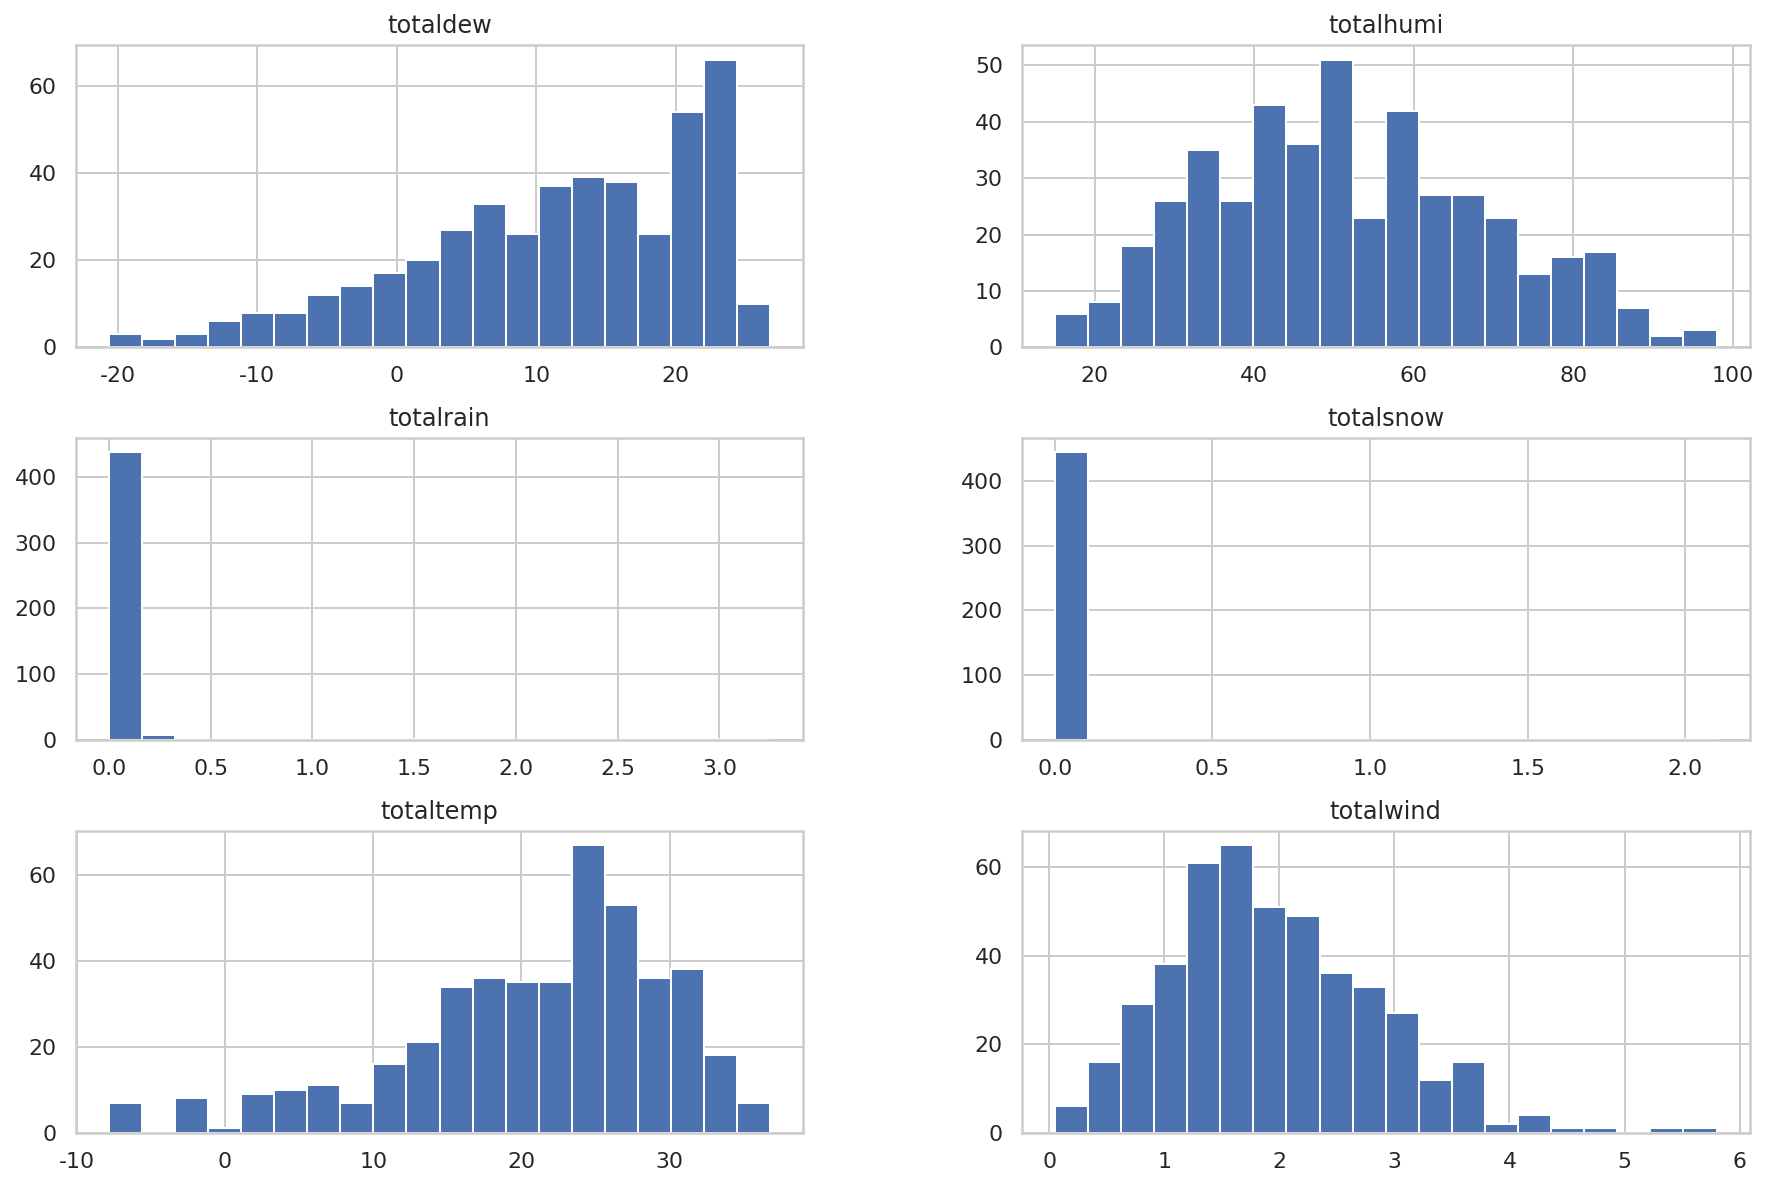

In [24]:
#탈진탈수
df_exh.hist(bins=20,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1921bc18>,
      dtype=object)

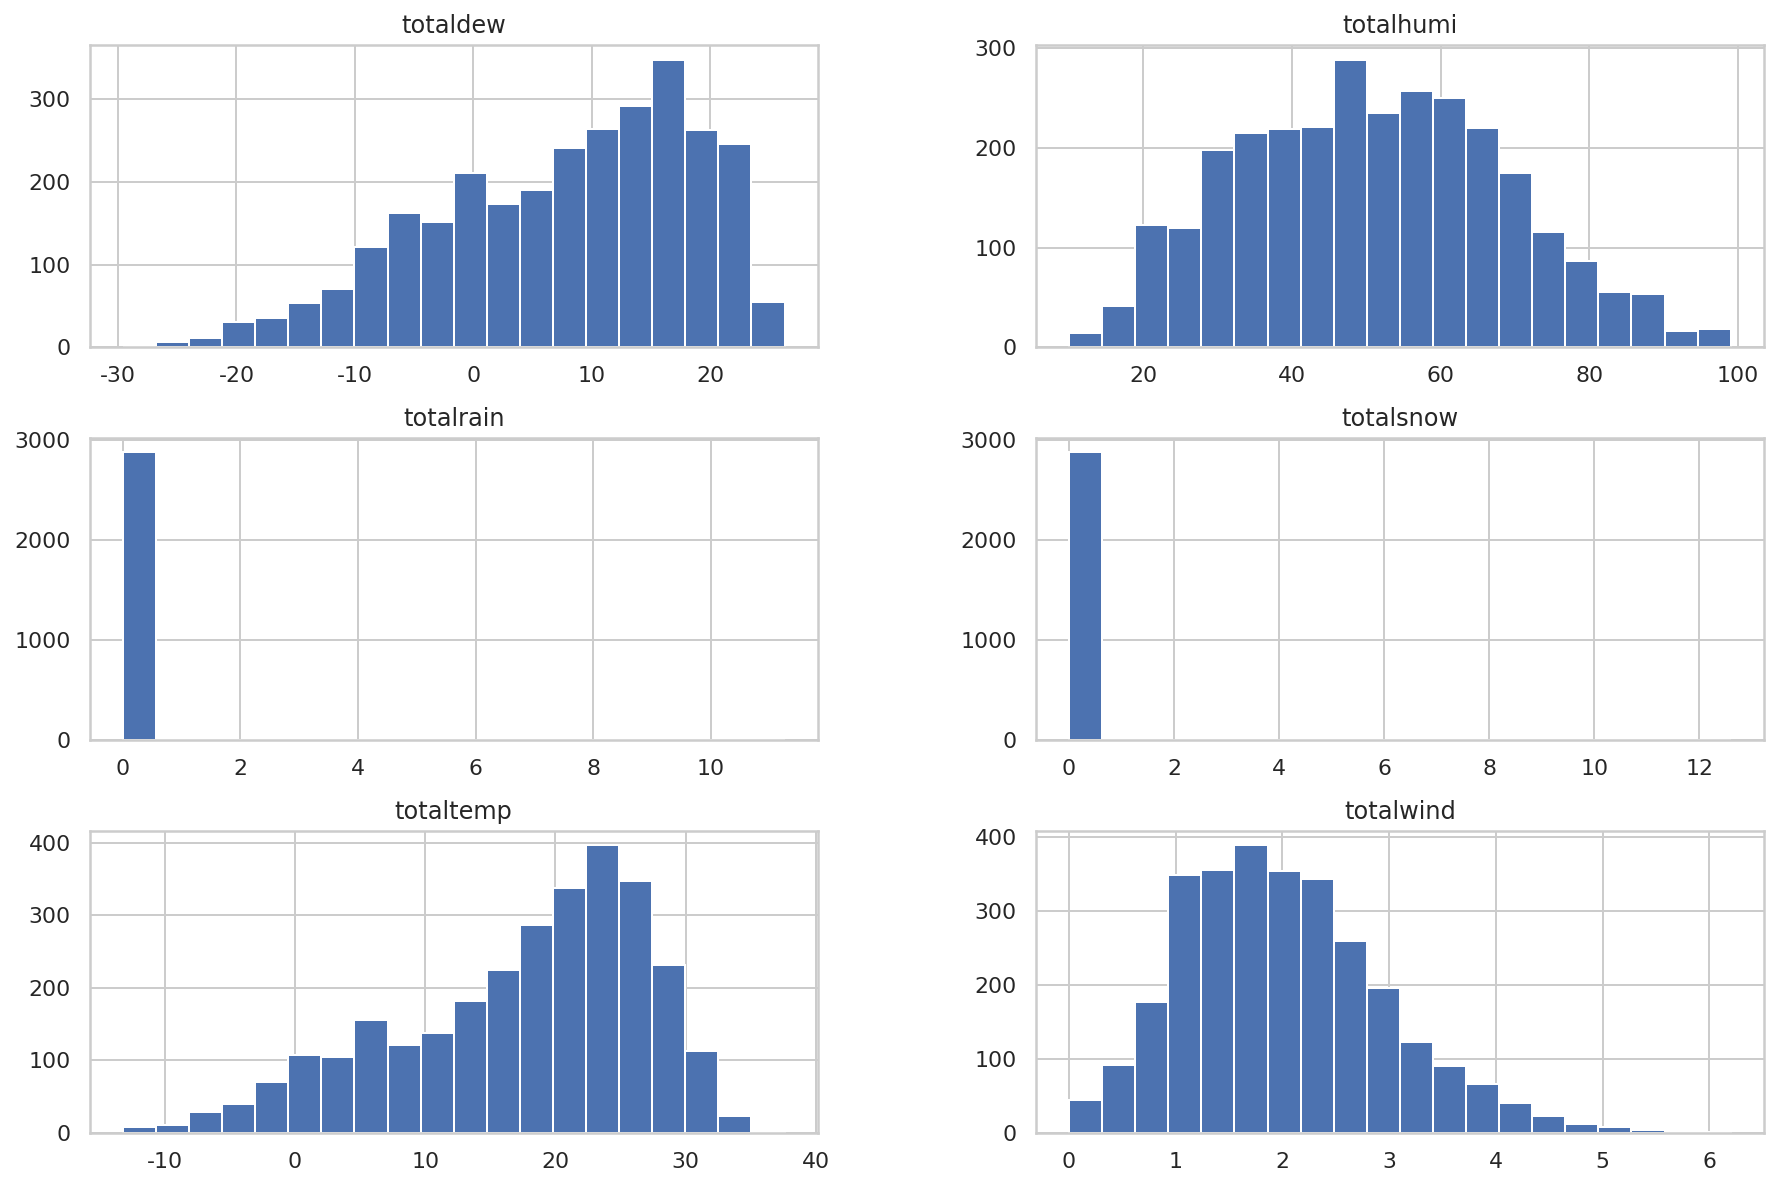

In [25]:
#개인질병
df_ill.hist(bins=20,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c192aaf98>,
      dtype=object)

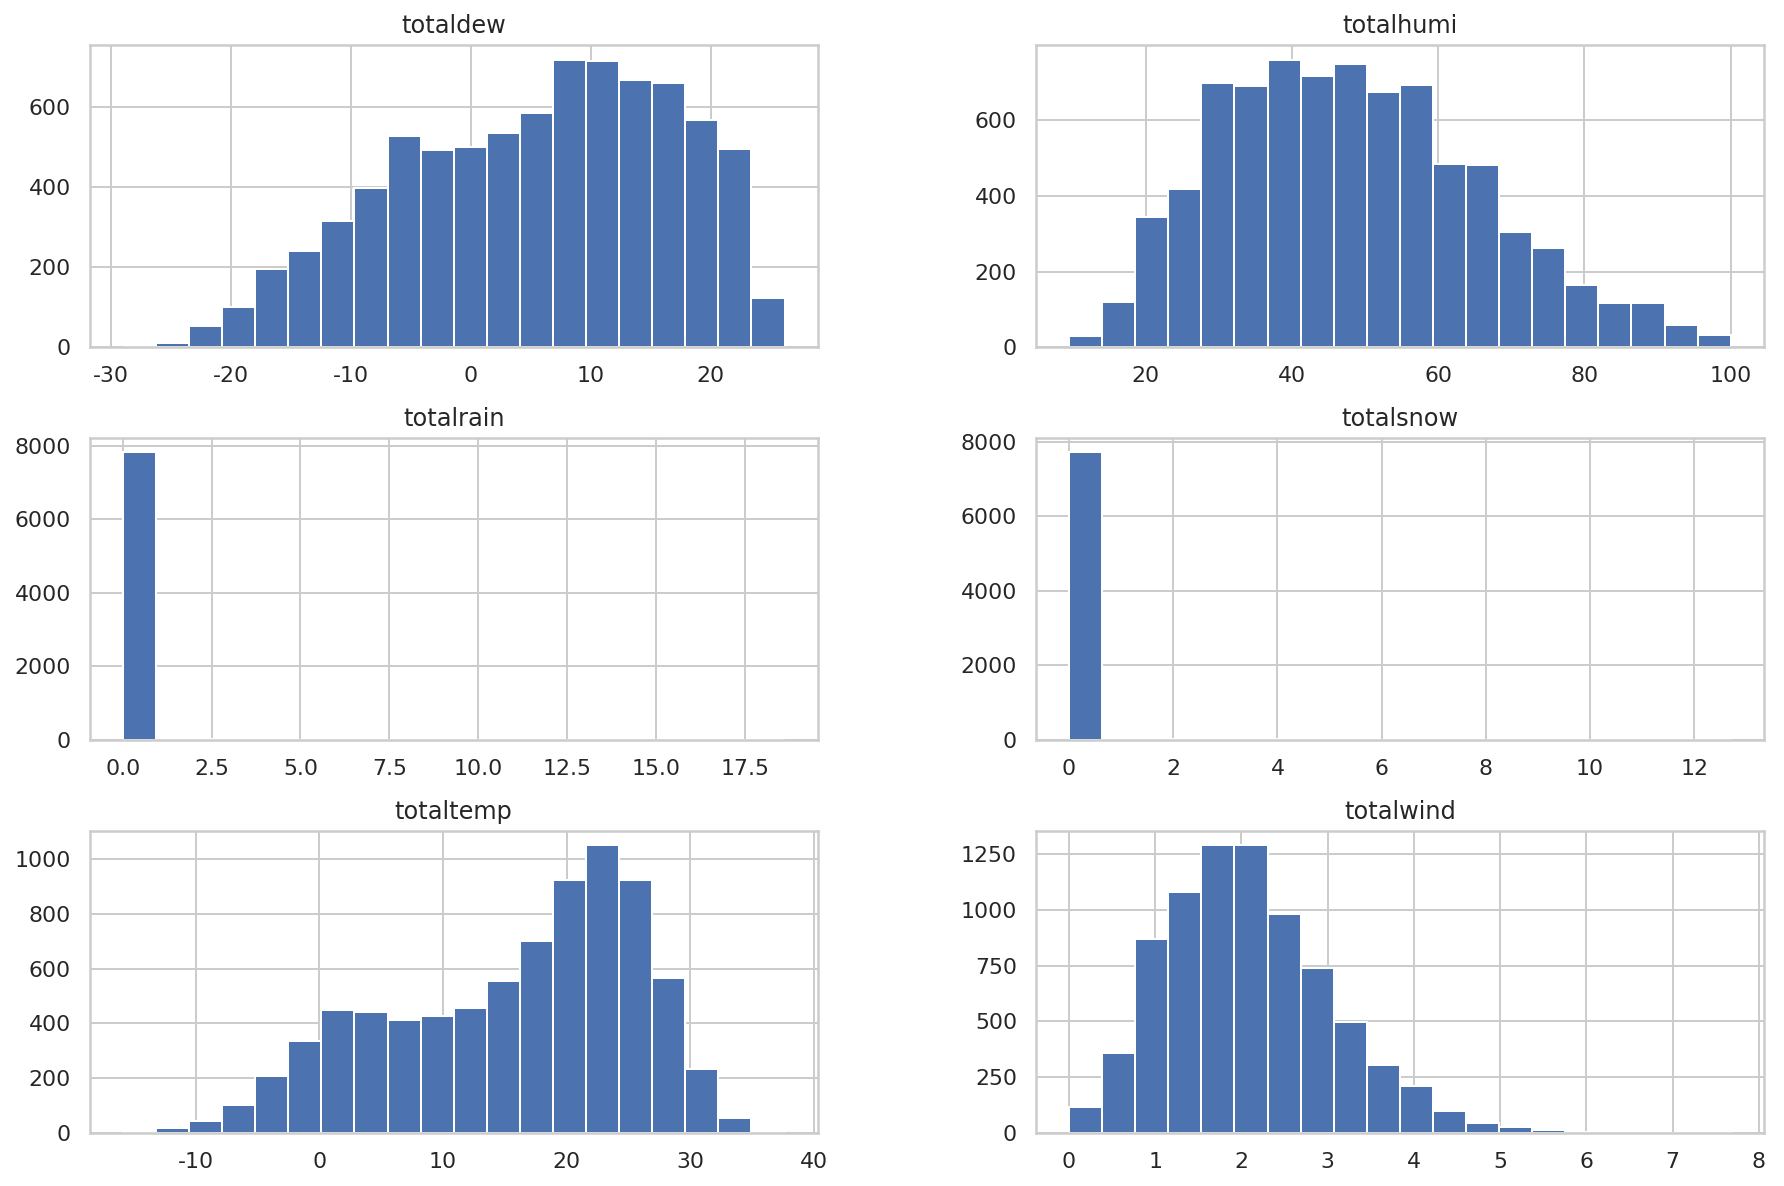

In [26]:
#추락
df_drop.hist(bins=20,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18c5f908>,
      dtype=object)

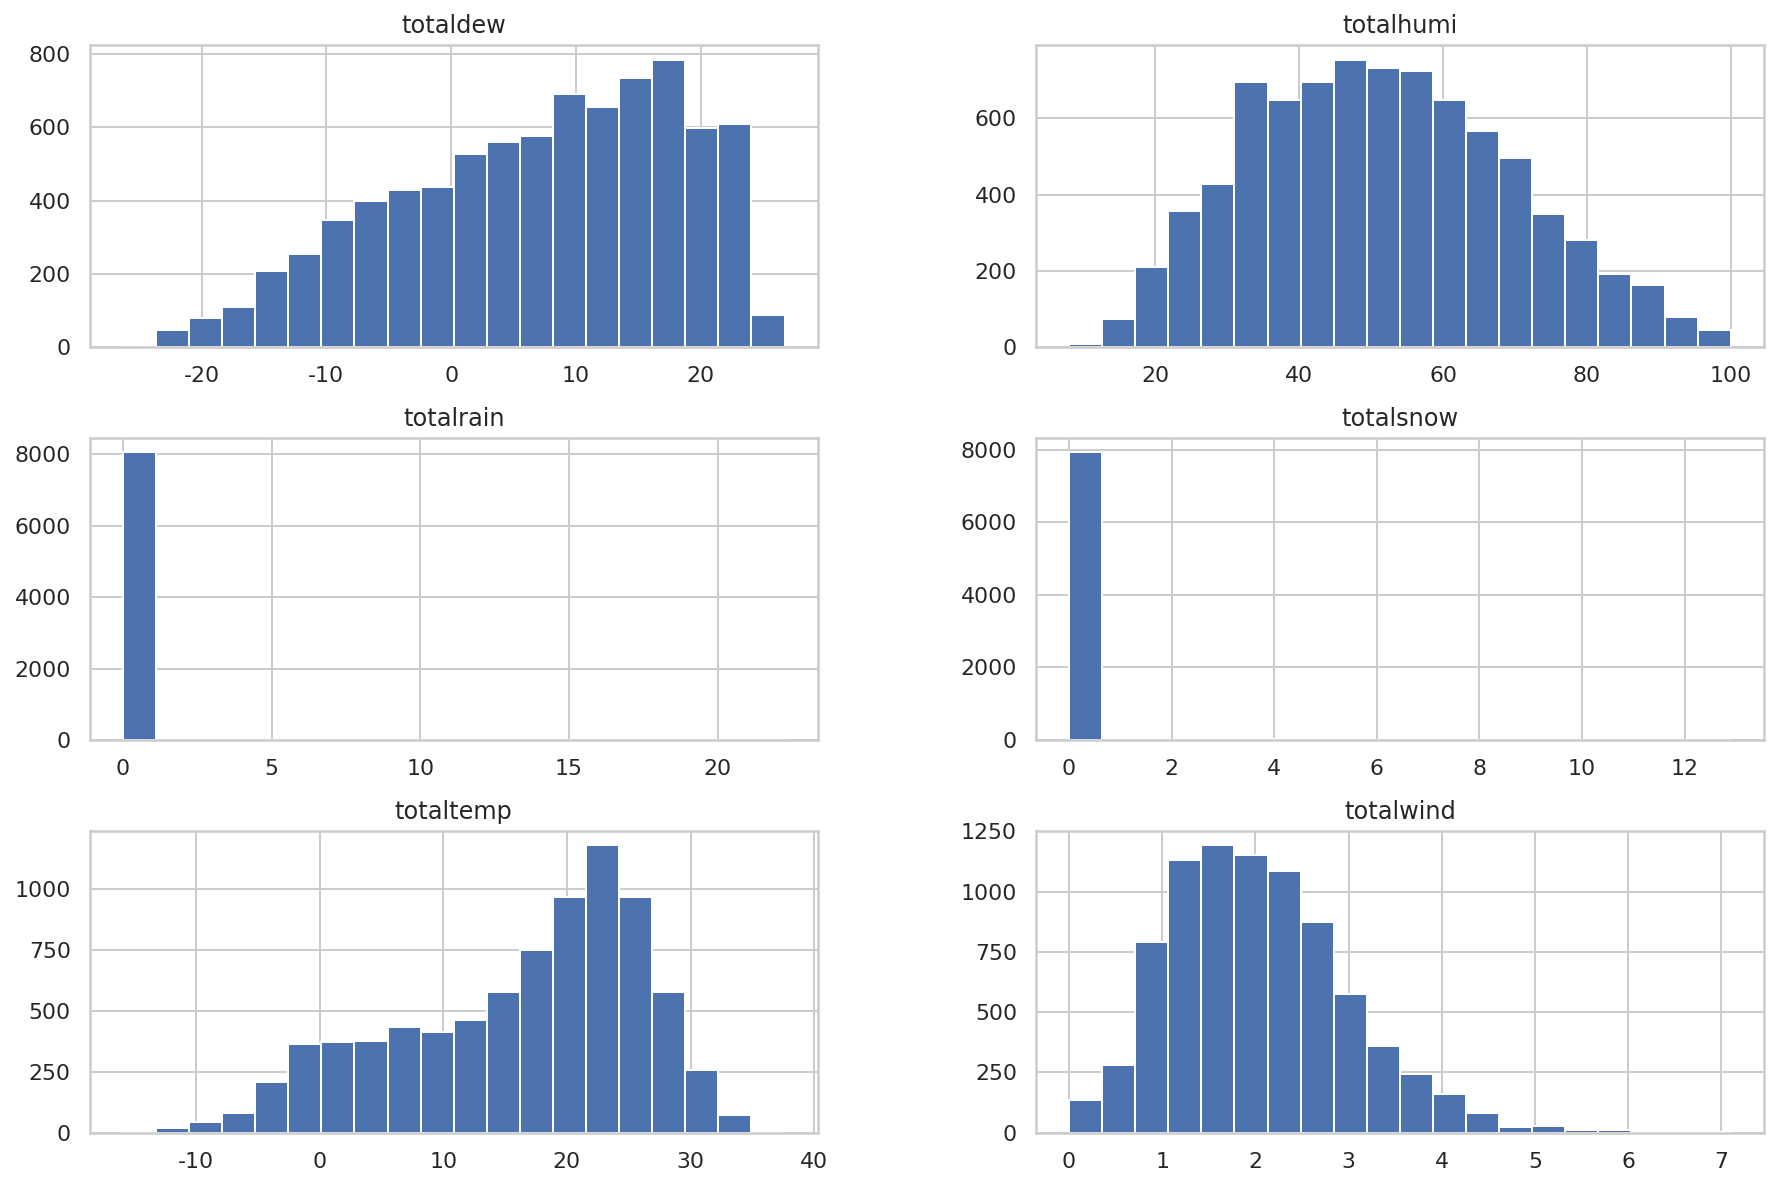

In [27]:
#기타
df_etc.hist(bins=20,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18d9a7b8>,
      dtype=object)

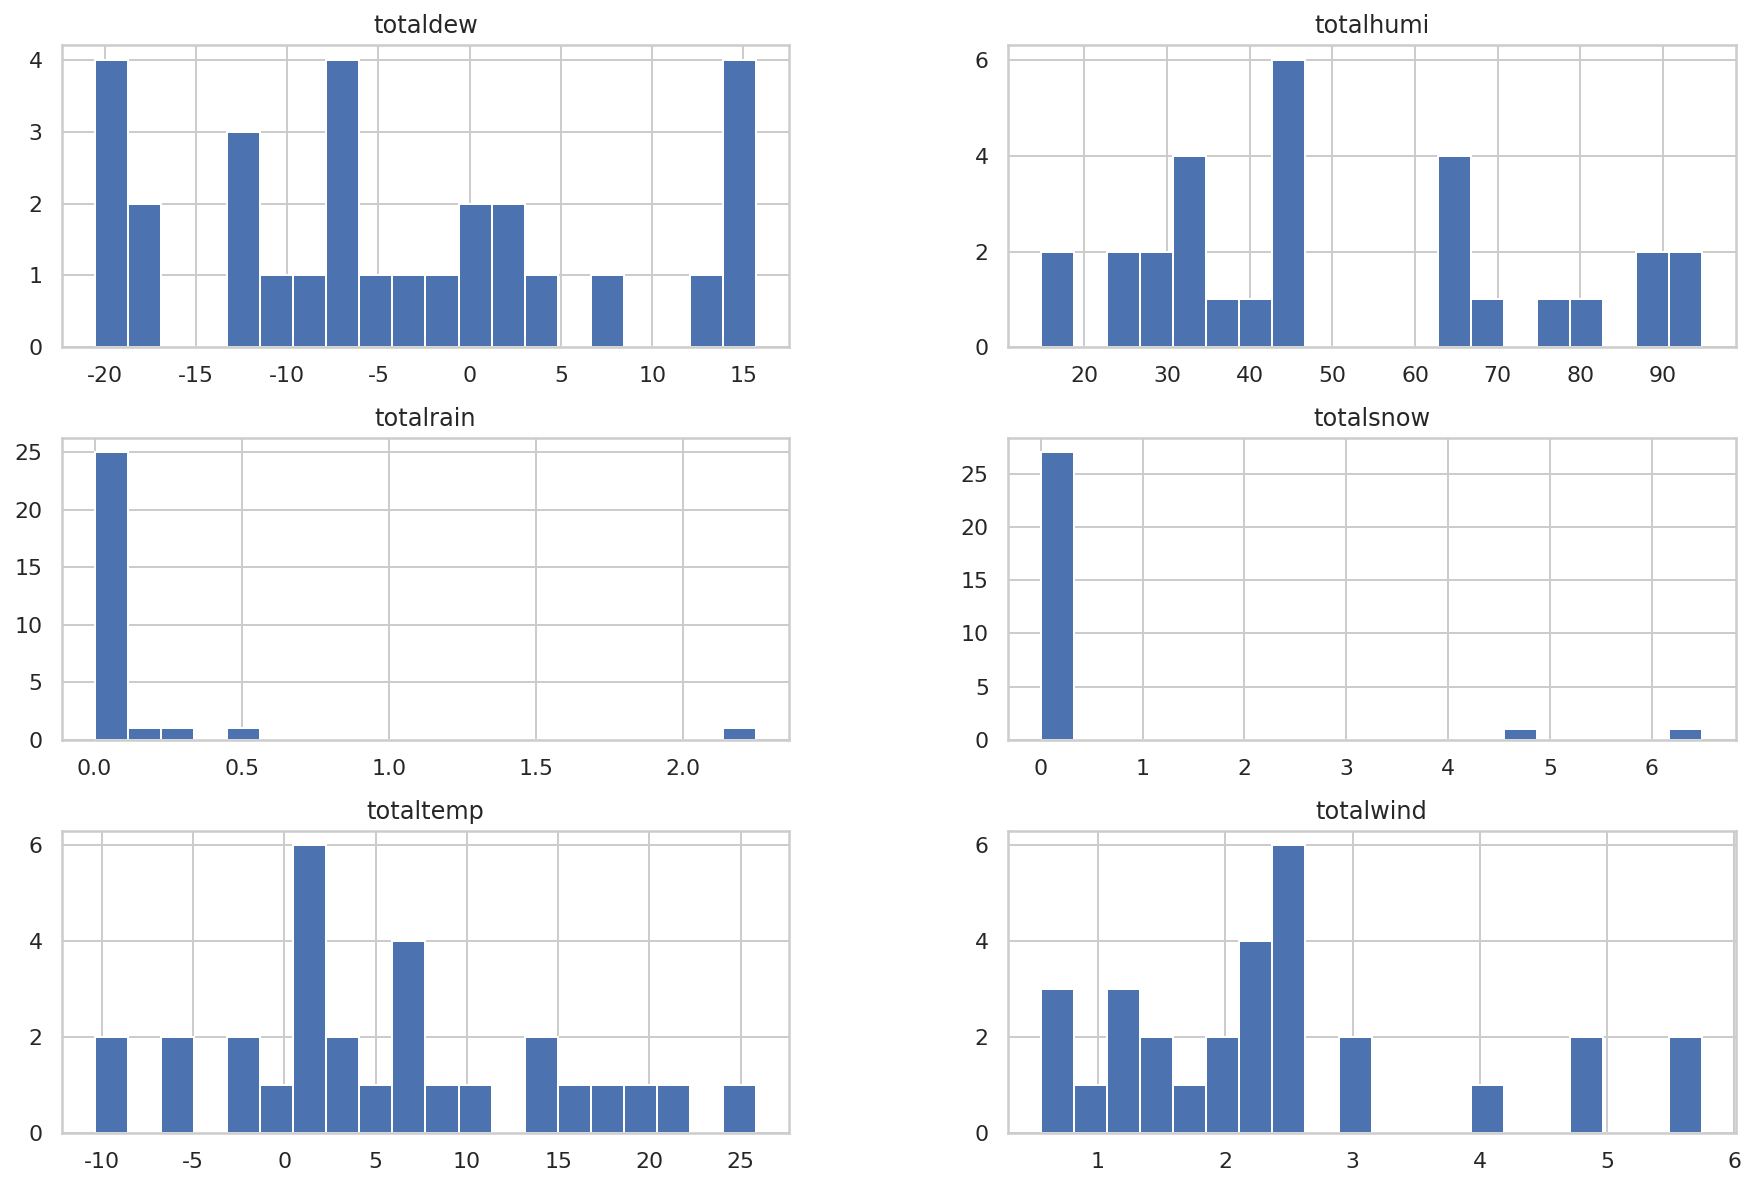

In [28]:
df_lowtemp.hist(bins=20,figsize=(15,10)) # 못쓴다

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c19a0cdd8>,
      dtype=object)

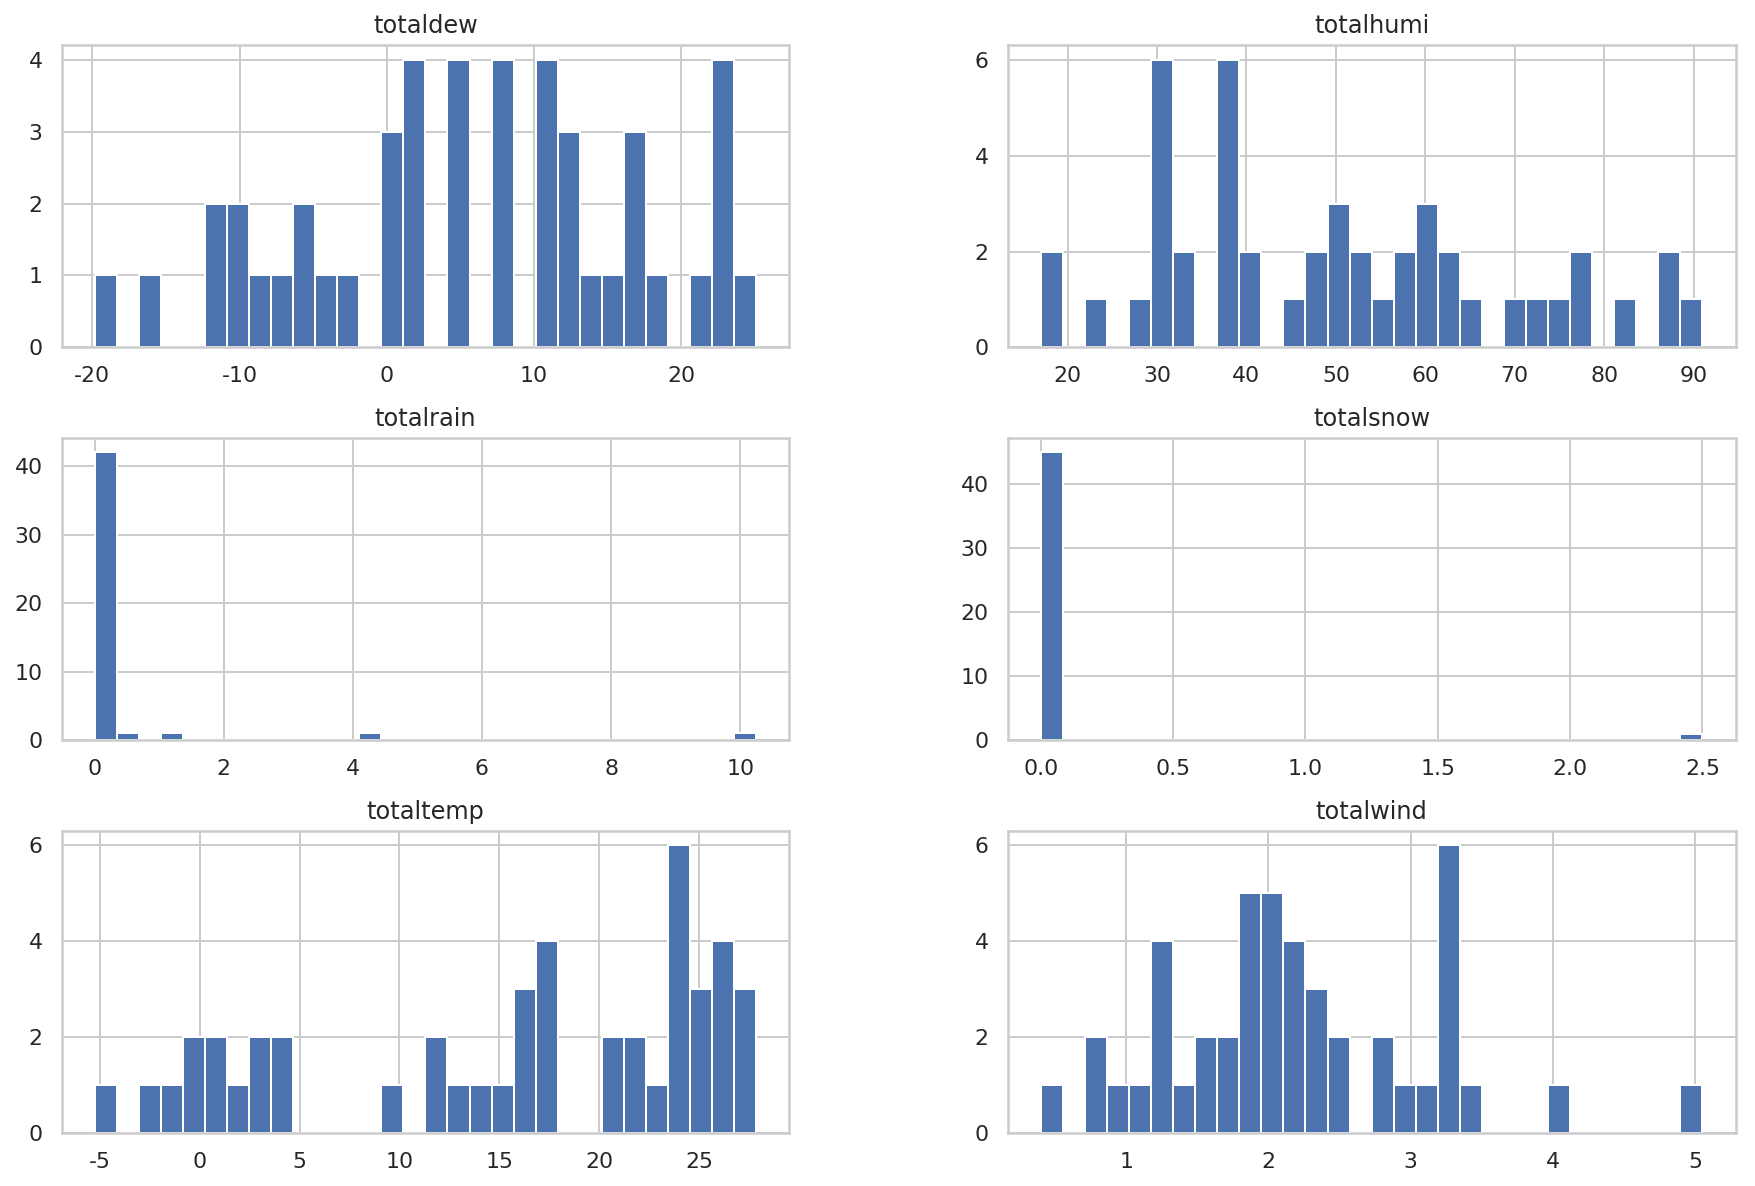

In [29]:
df_rock.hist(bins=30,figsize=(15,10)) # 못쓴다

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25b51940>,
      dtype=object)

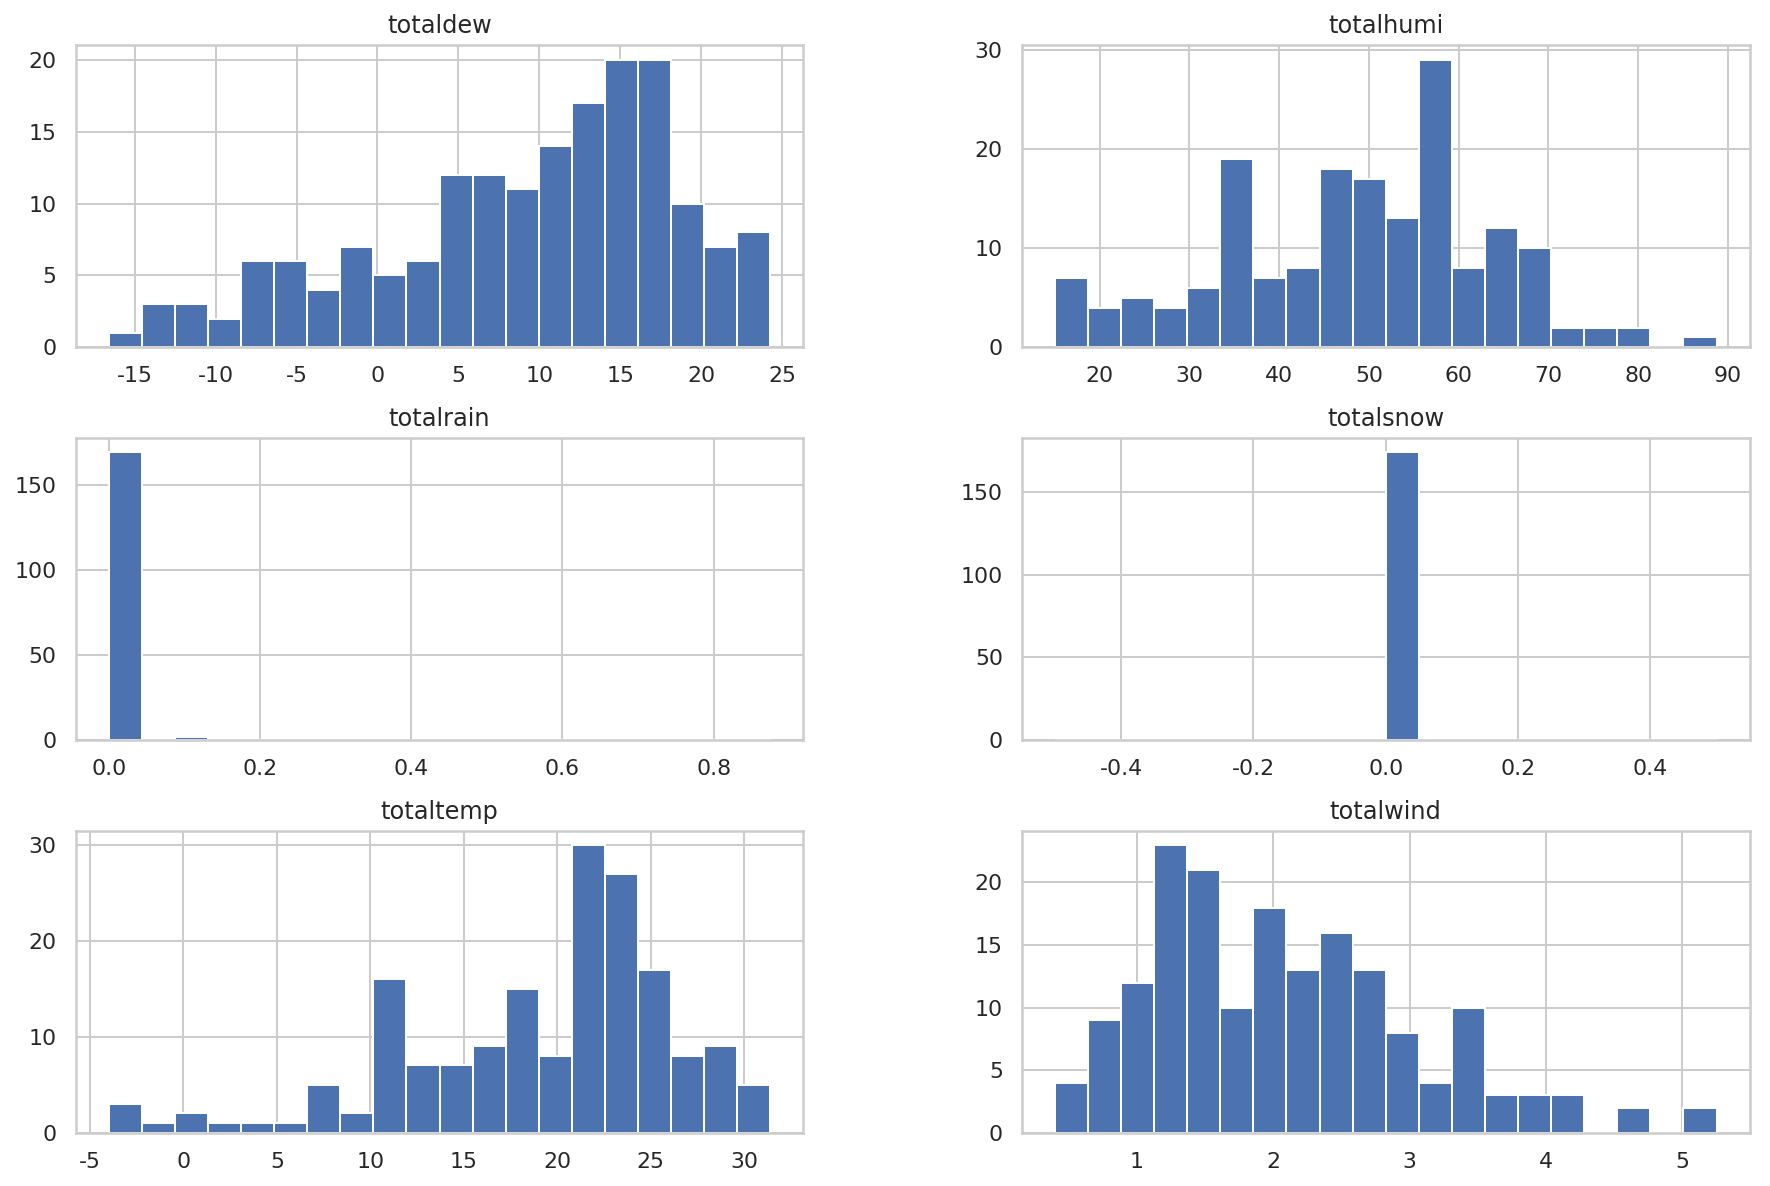

In [30]:
df_climb.hist(bins=20,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29fa2cf8>,
      dtype=object)

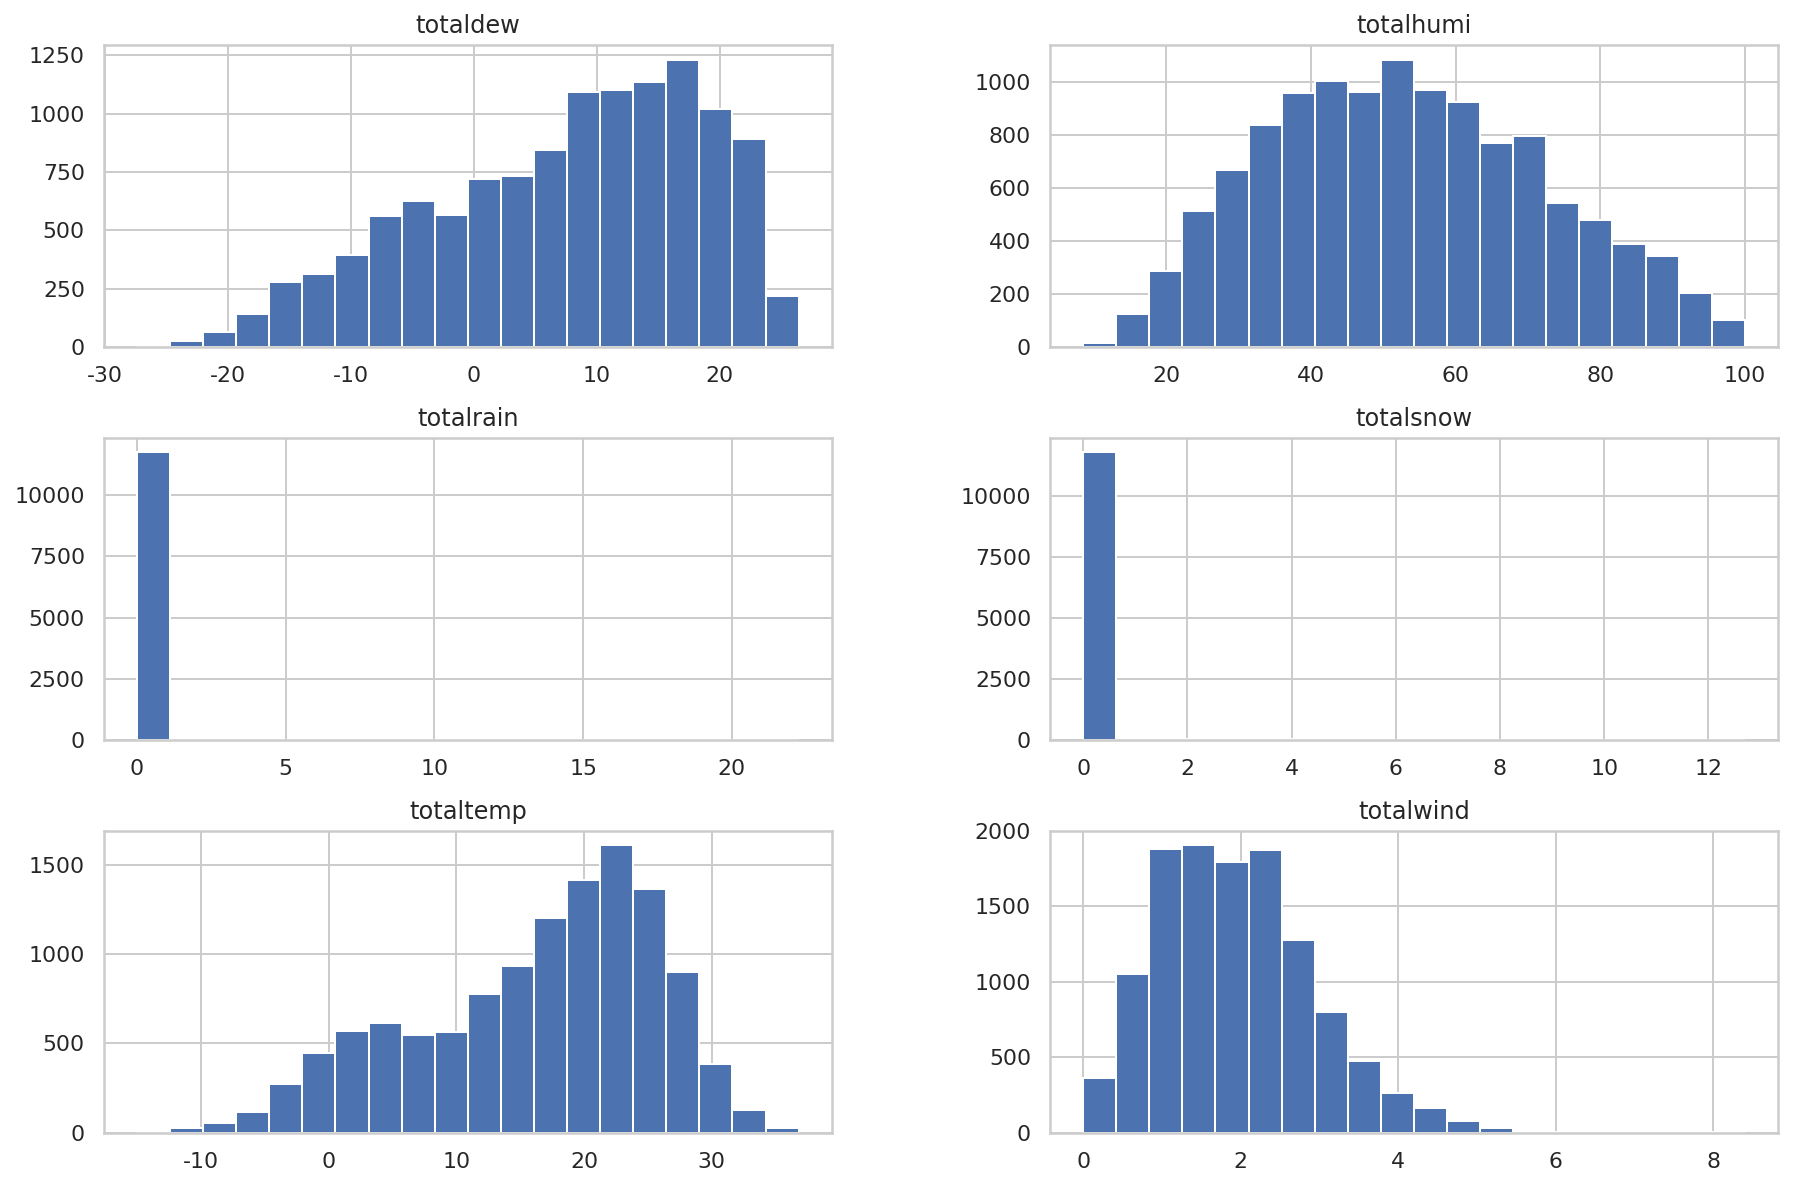

In [31]:
df_distress.hist(bins=20,figsize=(15,10))

In [32]:
df_mean = df.groupby(['Cause']).mean()
df_mean

,totalhumi,totaltemp,totalwind,totalrain,totaldew,totalsnow
Cause,,,,,,
개인질환,50.856982,17.481859,2.003105,0.041096,7.562727,0.070912
낙석낙빙,49.913043,15.596739,2.192935,0.364130,5.676087,0.054348
산악기타,51.409295,16.228359,2.031024,0.060214,6.832235,0.118432
실족추락,48.146079,15.741171,2.085332,0.046392,5.333319,0.090280
암벽등반,48.577586,19.148707,2.089799,0.010776,9.176580,0.000000
일반조난,53.272955,16.320646,1.945483,0.097356,7.396161,0.064224
저체온증,49.750000,5.324138,2.446552,0.107759,-3.981897,0.396552
탈진탈수,51.978889,20.886944,1.950056,0.026667,11.439198,0.014222


In [33]:
#낙석낙빙
df_rock = df.where(df['Cause']=='낙석낙빙').dropna()
# 개인질환
df_ill = df.where(df['Cause']=='개인질환').dropna()
df_etc = lists[0] #산악기타
df_drop = lists[1] #실족추락
df_climb = lists[2] #암벽등반
df_distress = lists[3] #일반조난
df_lowtemp = lists[4] #저체온증
df_exh = lists[5] #탈진탈수

In [34]:
col_list = df.columns[1:7]
col_list

Index(['totalhumi', 'totaltemp', 'totalwind', 'totalrain', 'totaldew',
       'totalsnow'],
      dtype='object')

In [35]:
plt.rcParams["figure.figsize"] = (7,7)
sns.set(rc={'figure.figsize':(7,7)})

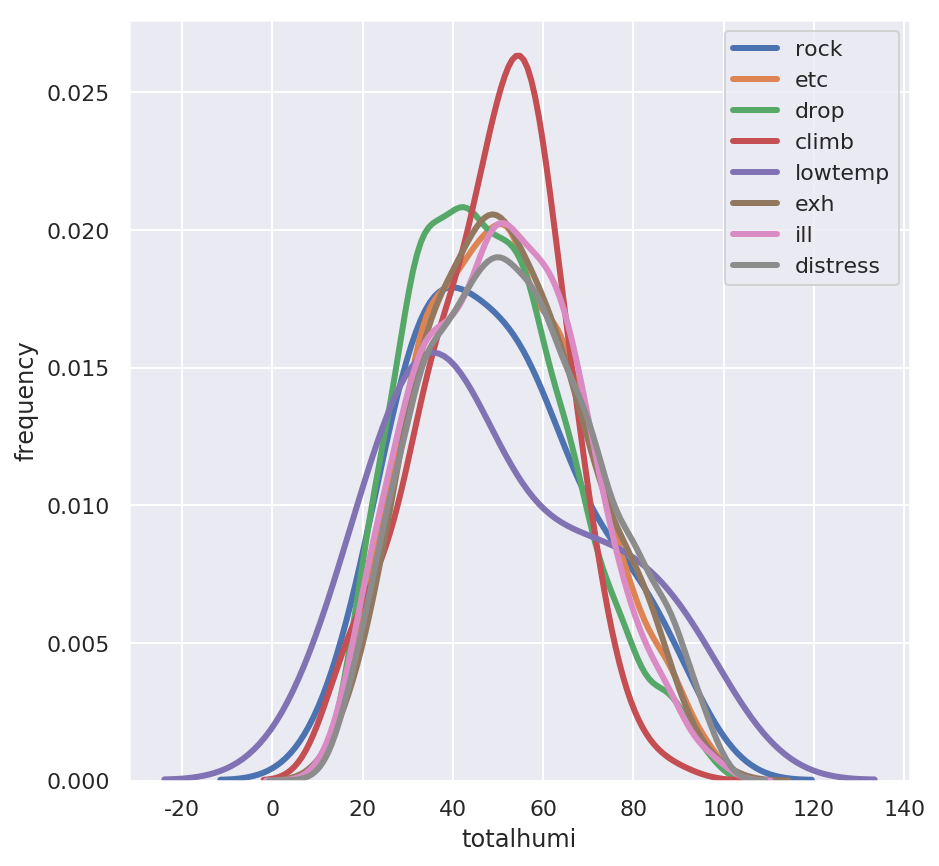

In [36]:
for i in ['totalhumi']:
    sns.distplot(df_rock[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='rock')
    sns.distplot(df_etc[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='etc')
    sns.distplot(df_drop[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='drop')
    sns.distplot(df_climb[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='climb')
    sns.distplot(df_lowtemp[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='lowtemp')
    sns.distplot(df_exh[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='exh')
    sns.distplot(df_ill[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='ill')
    sns.distplot(df_distress[i],hist=False, kde=True, kde_kws= {'linewidth':3}, label='distress')
    plt.legend()
    plt.xlabel(i)
    plt.ylabel('frequency')

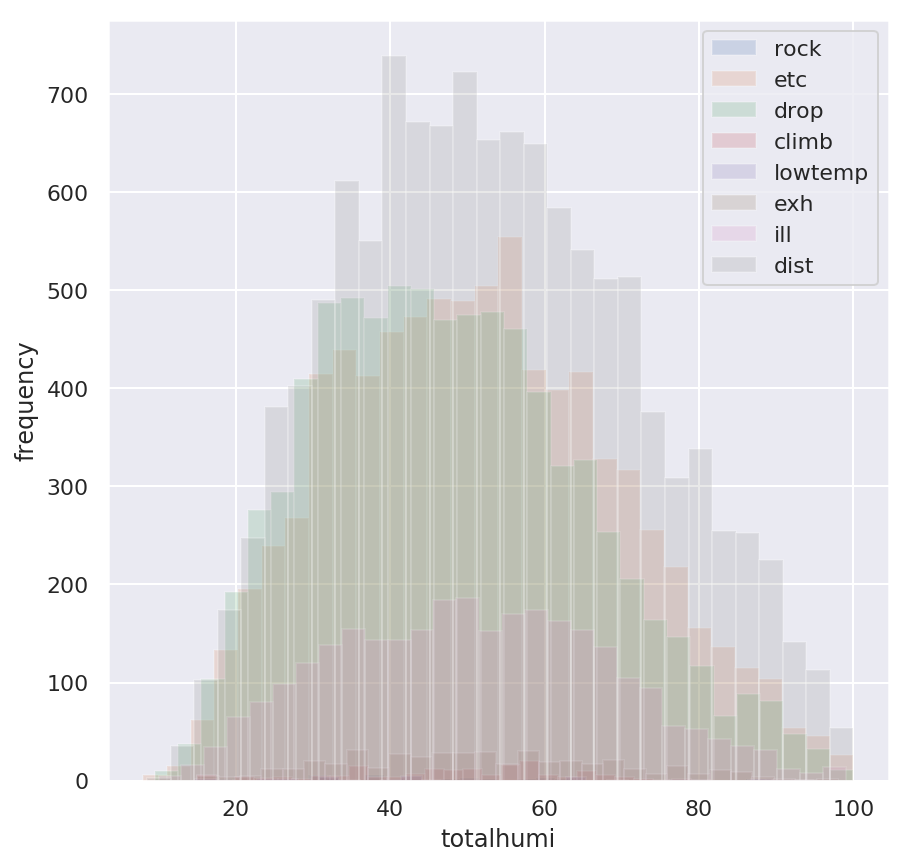

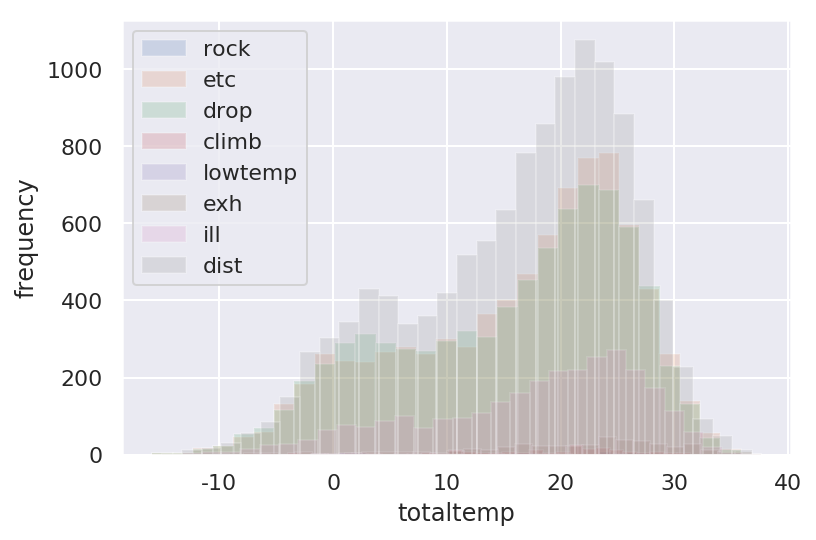

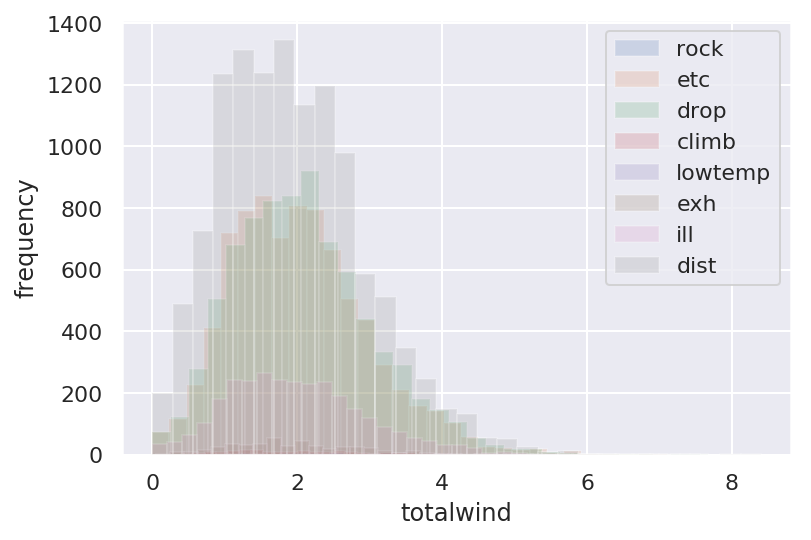

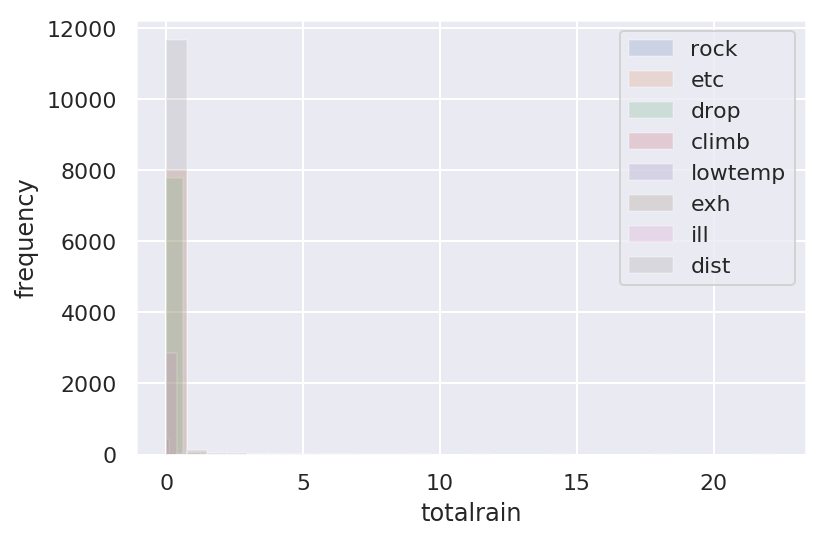

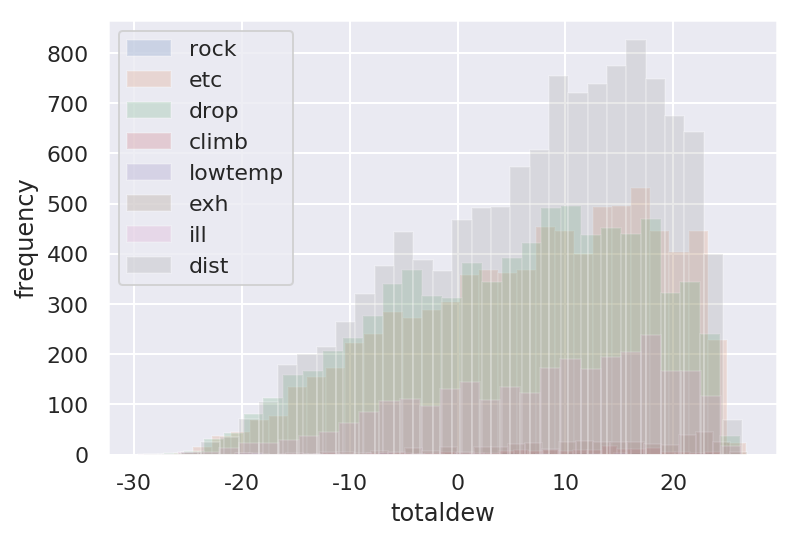

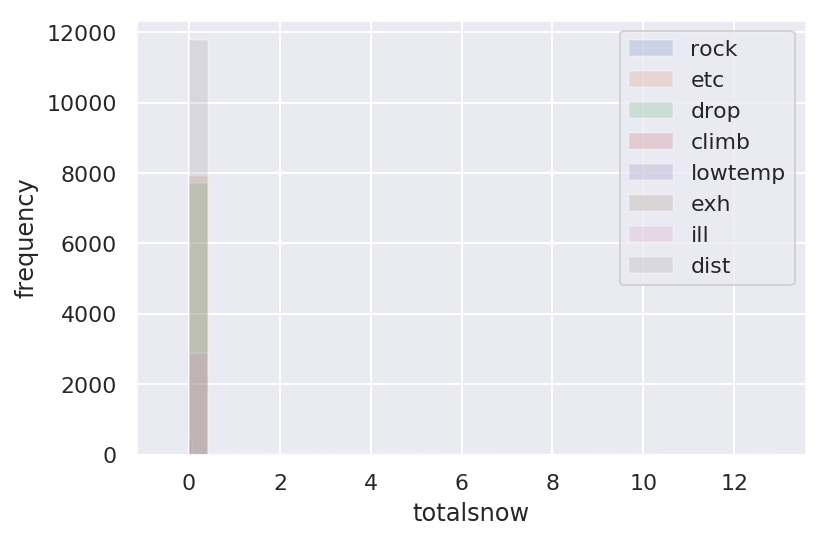

In [37]:
for i in col_list:
    plt.hist(df_rock[i], bins=30,alpha= 0.2, label='rock')
    plt.hist(df_etc[i], bins=30,alpha= 0.2, label='etc')
    plt.hist(df_drop[i], bins=30,alpha= 0.2, label='drop')
    plt.hist(df_climb[i], bins=30,alpha= 0.2, label='climb')
    plt.hist(df_lowtemp[i], bins=30,alpha= 0.2, label='lowtemp')
    plt.hist(df_exh[i], bins=30,alpha= 0.2, label='exh')
    plt.hist(df_ill[i], bins=30,alpha= 0.2, label='ill')
    plt.hist(df_distress[i],bins=30,alpha = 0.2, label='dist')
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.legend()
    plt.show()
    %matplotlib inline

Cause
개인질환    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
낙석낙빙    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
산악기타    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
실족추락    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
암벽등반    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
일반조난    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
저체온증    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
탈진탈수    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

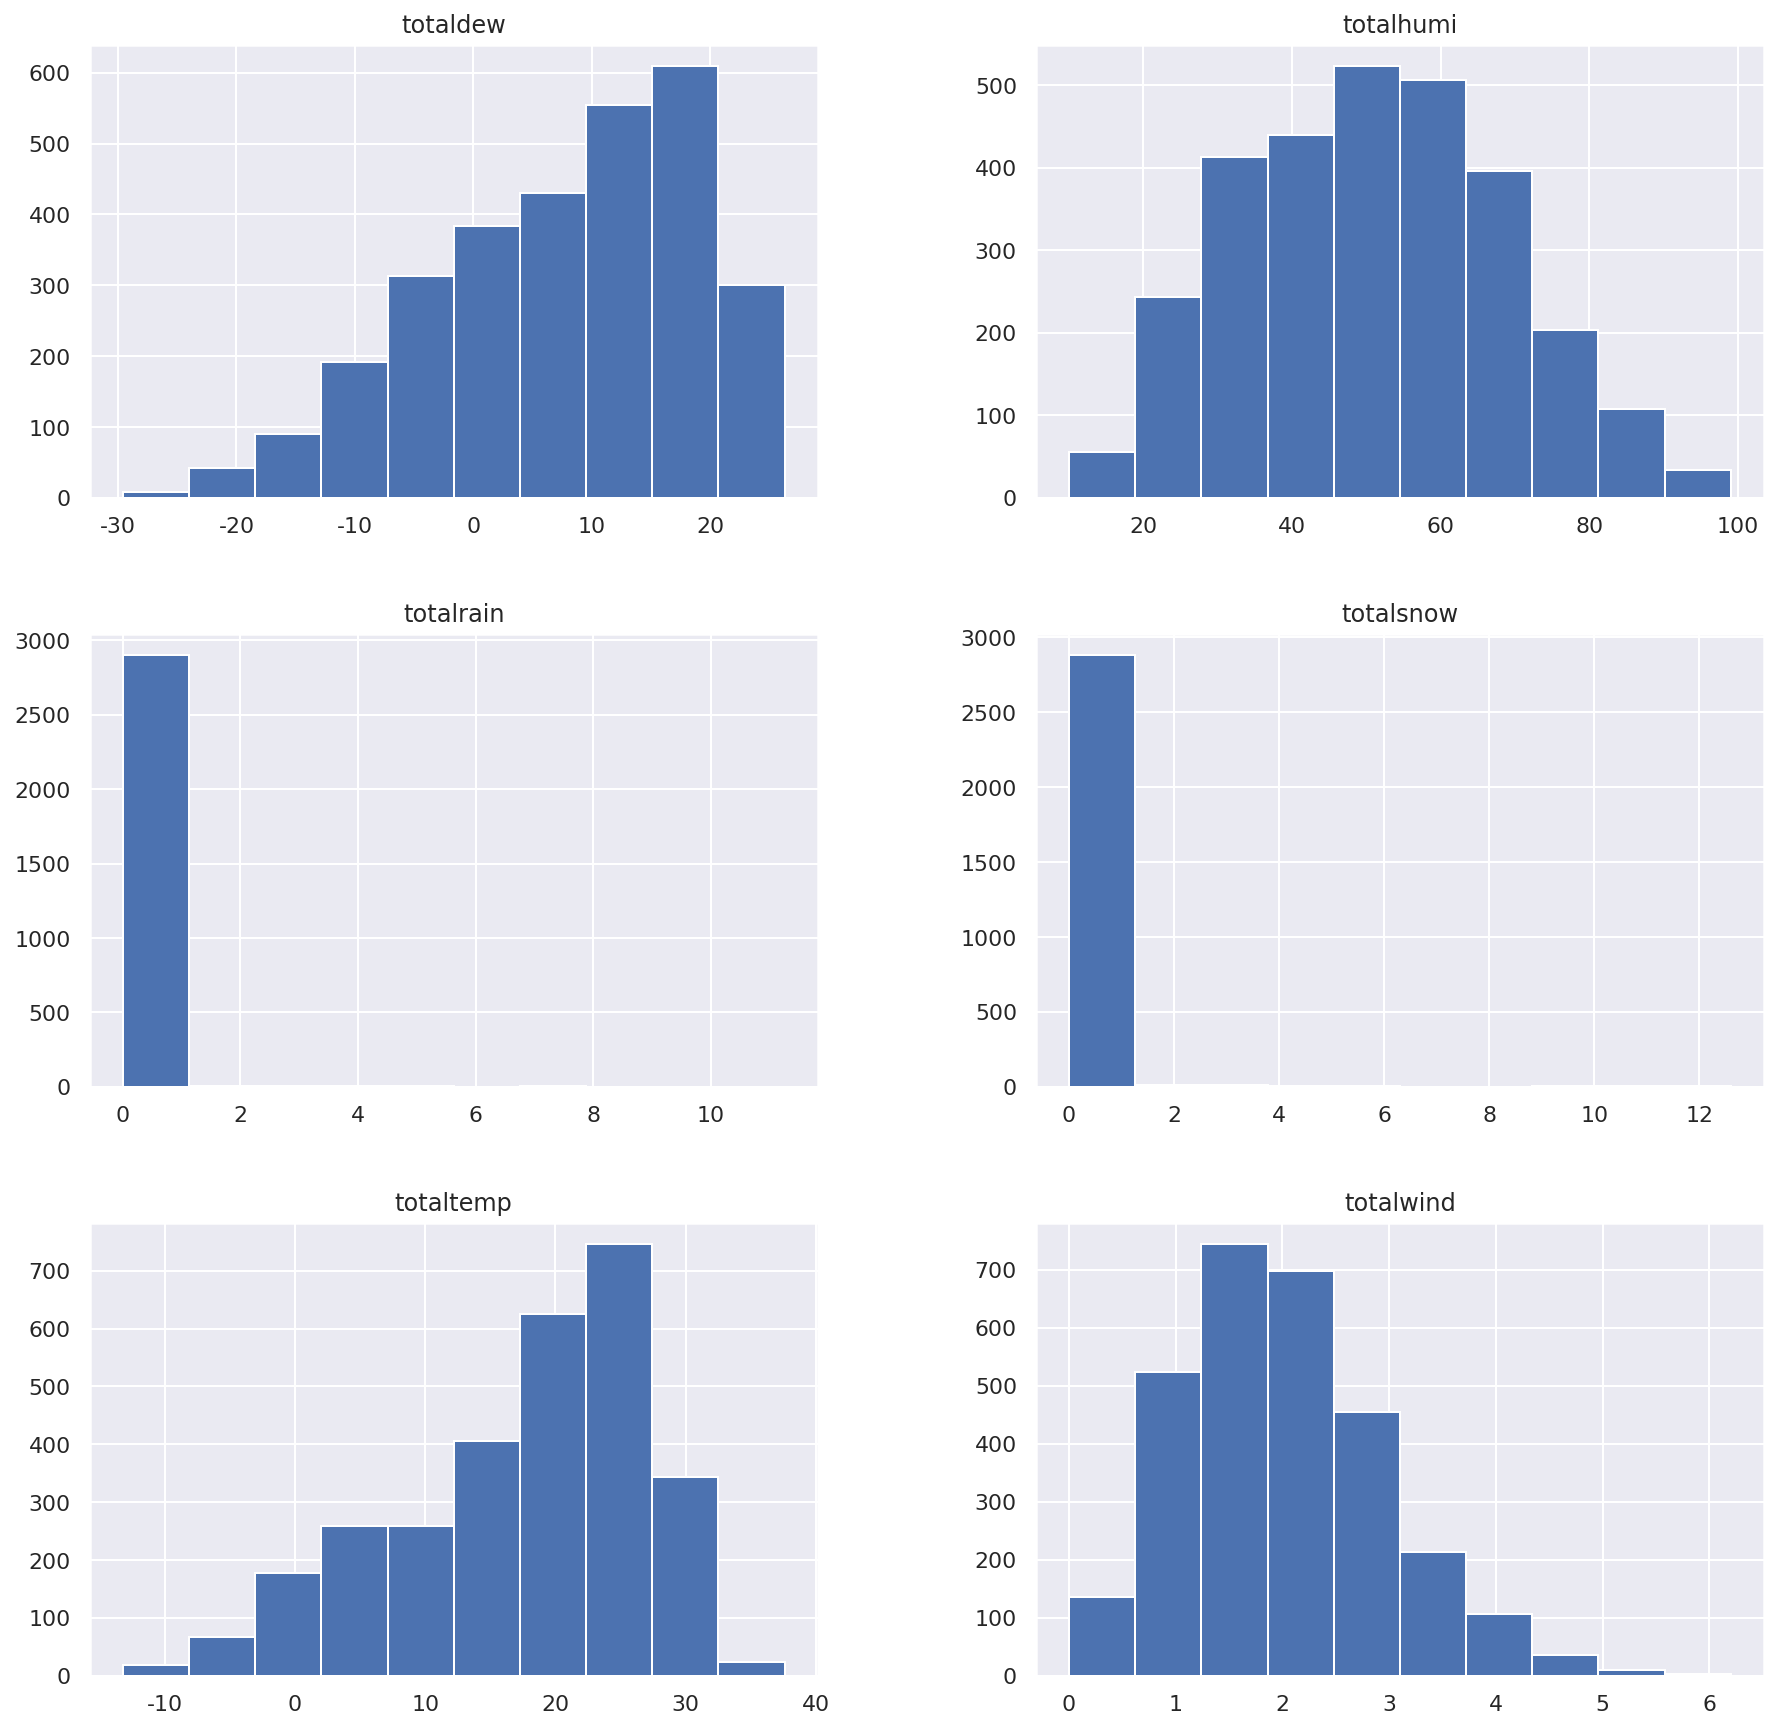

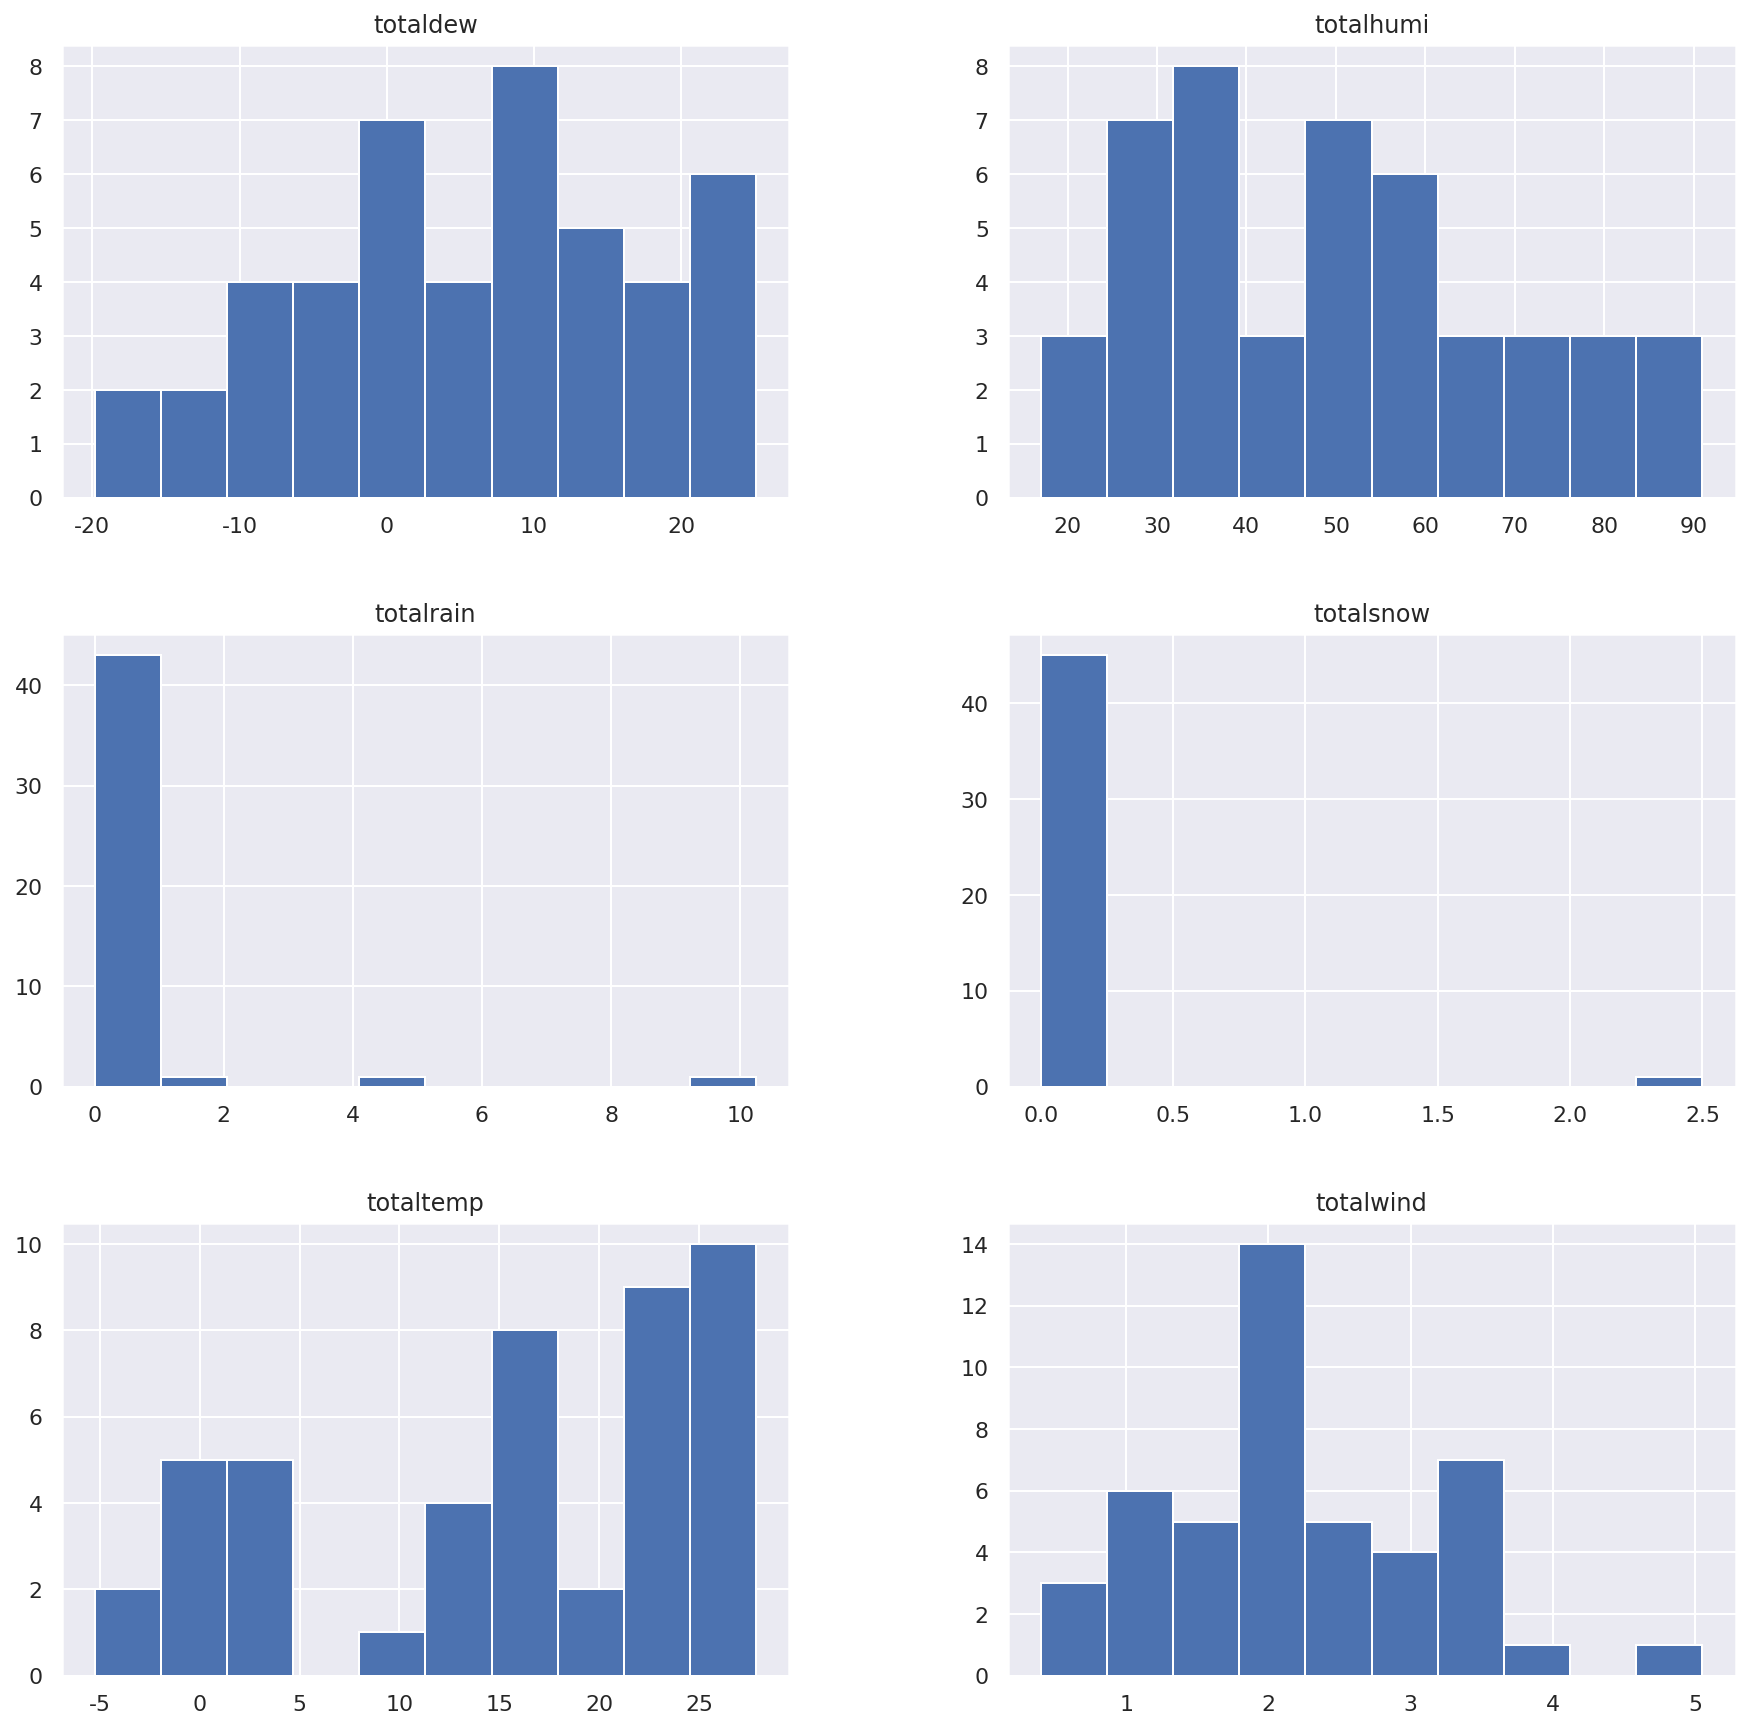

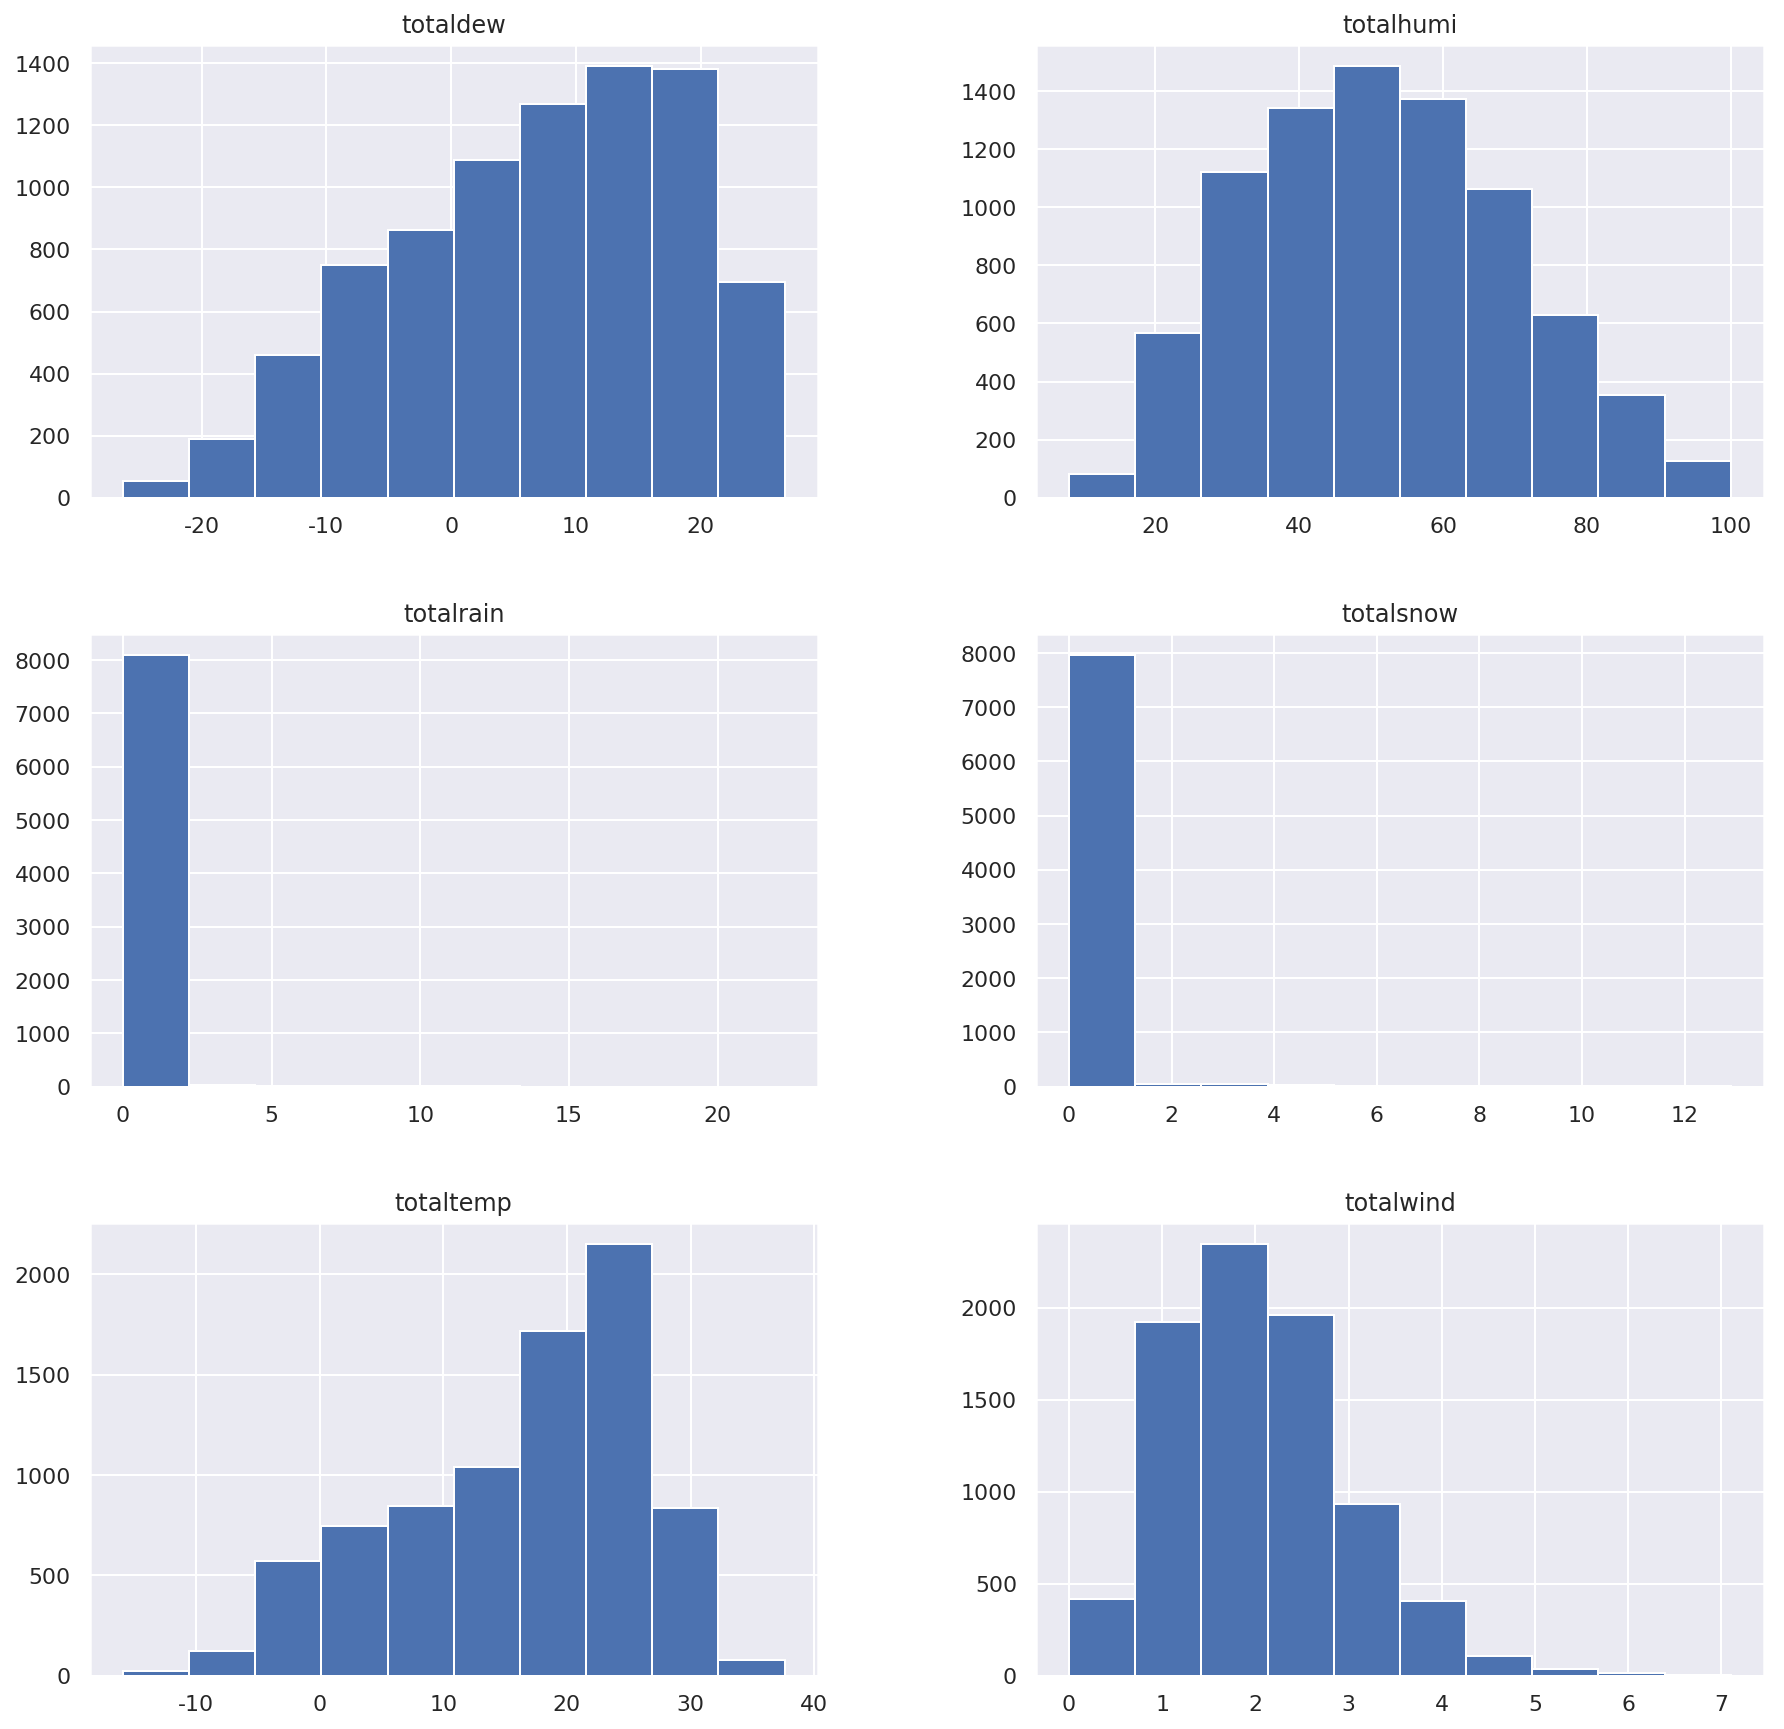

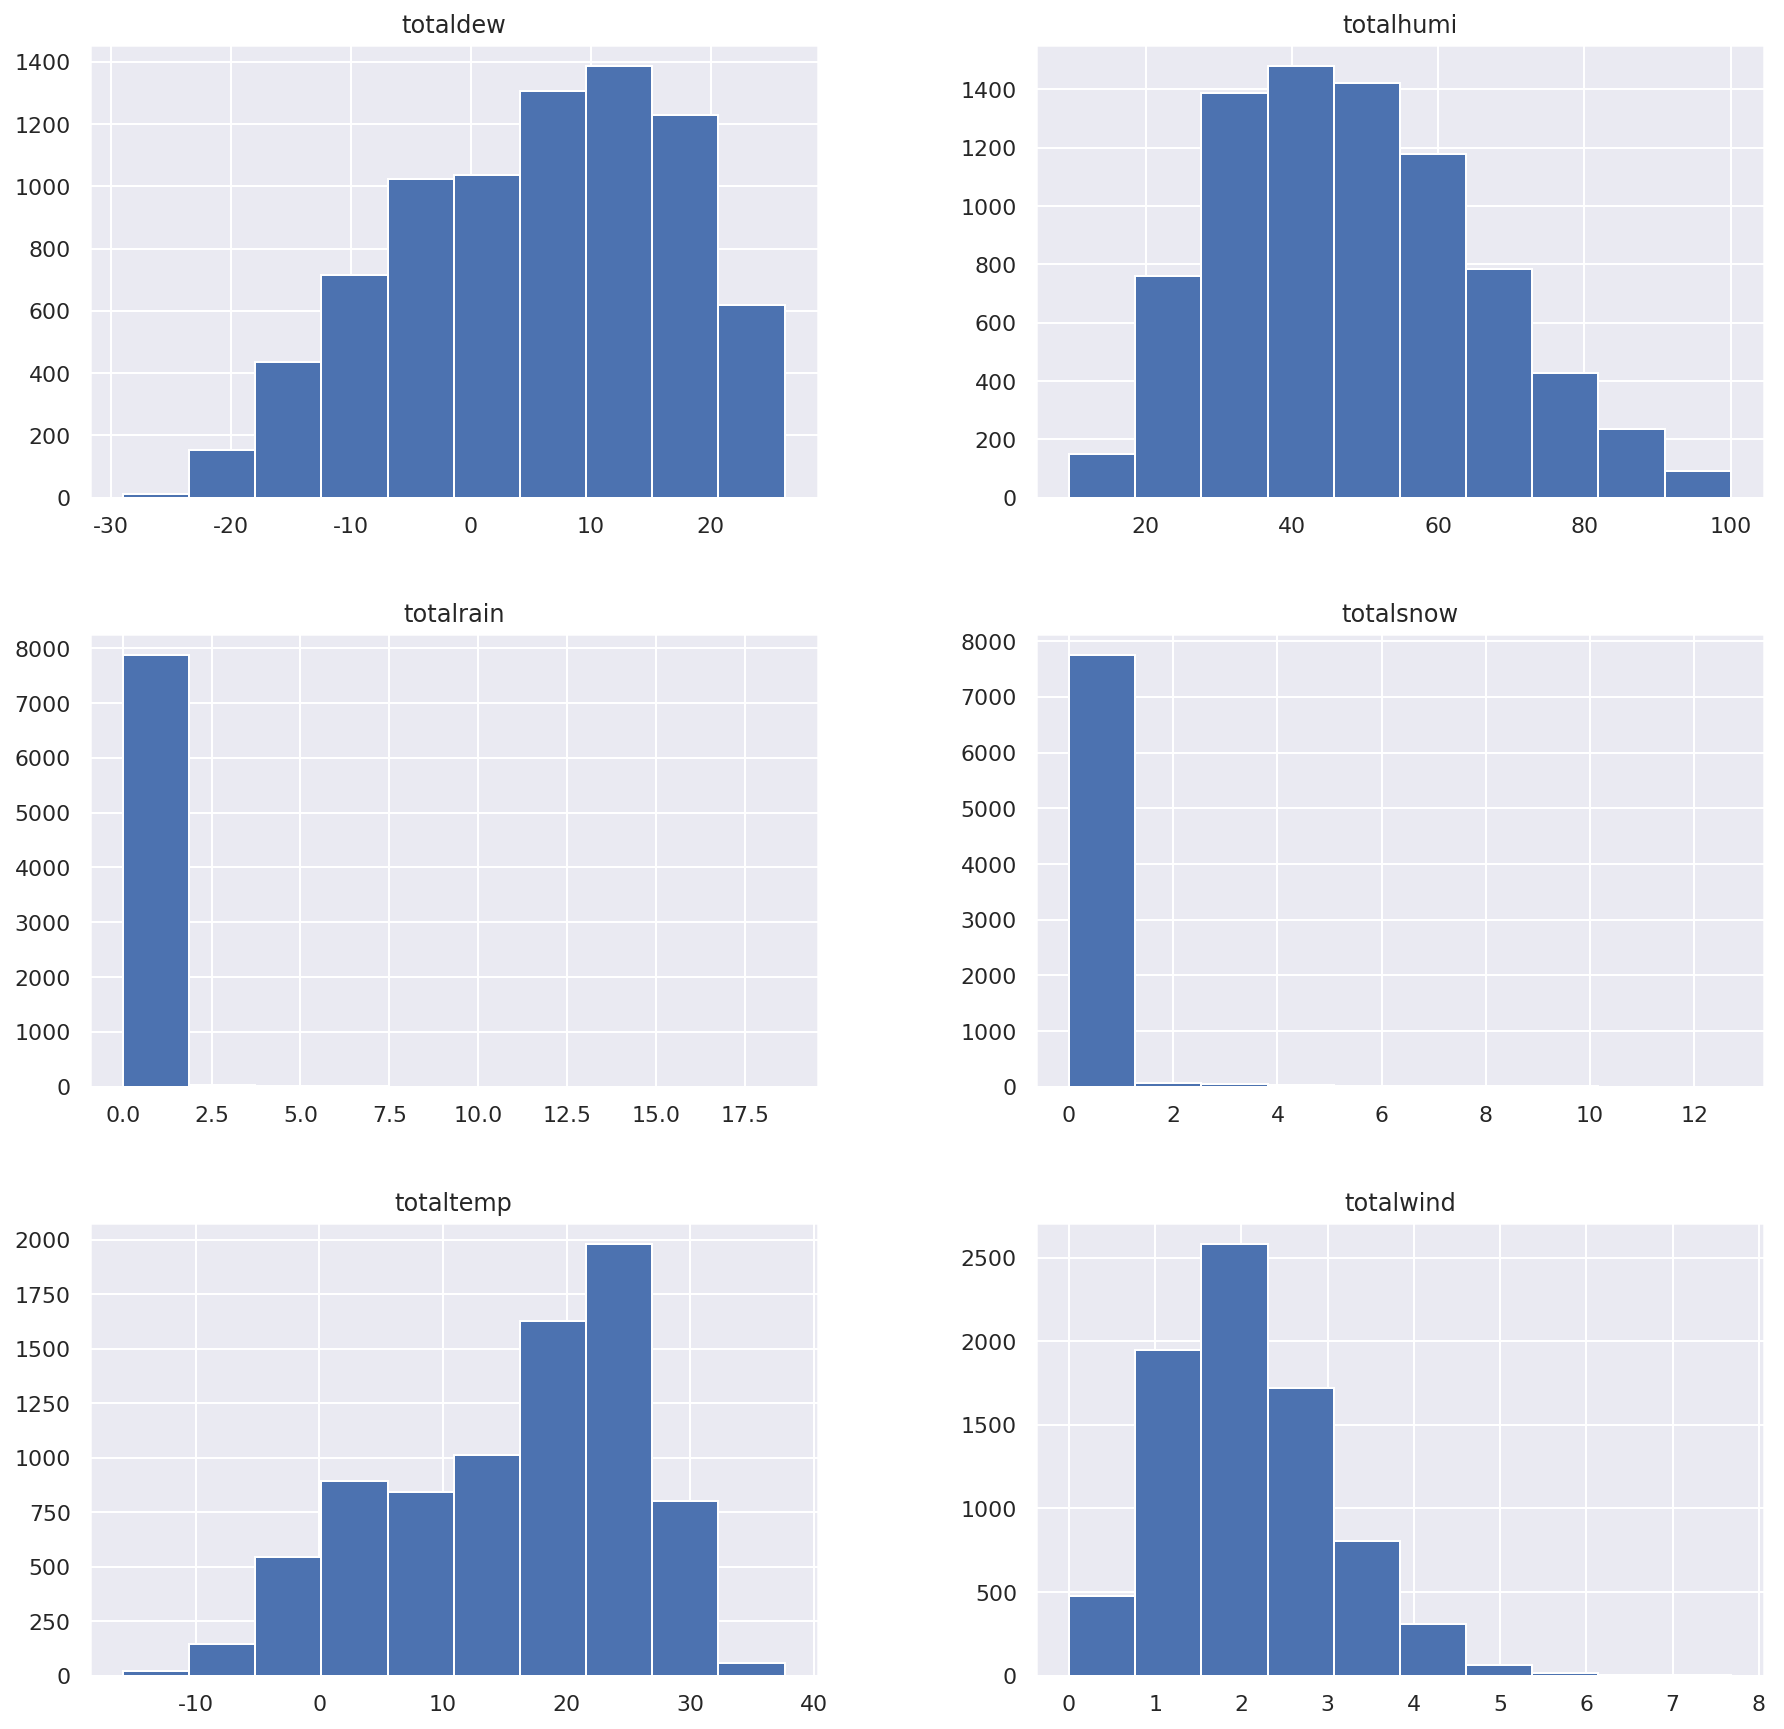

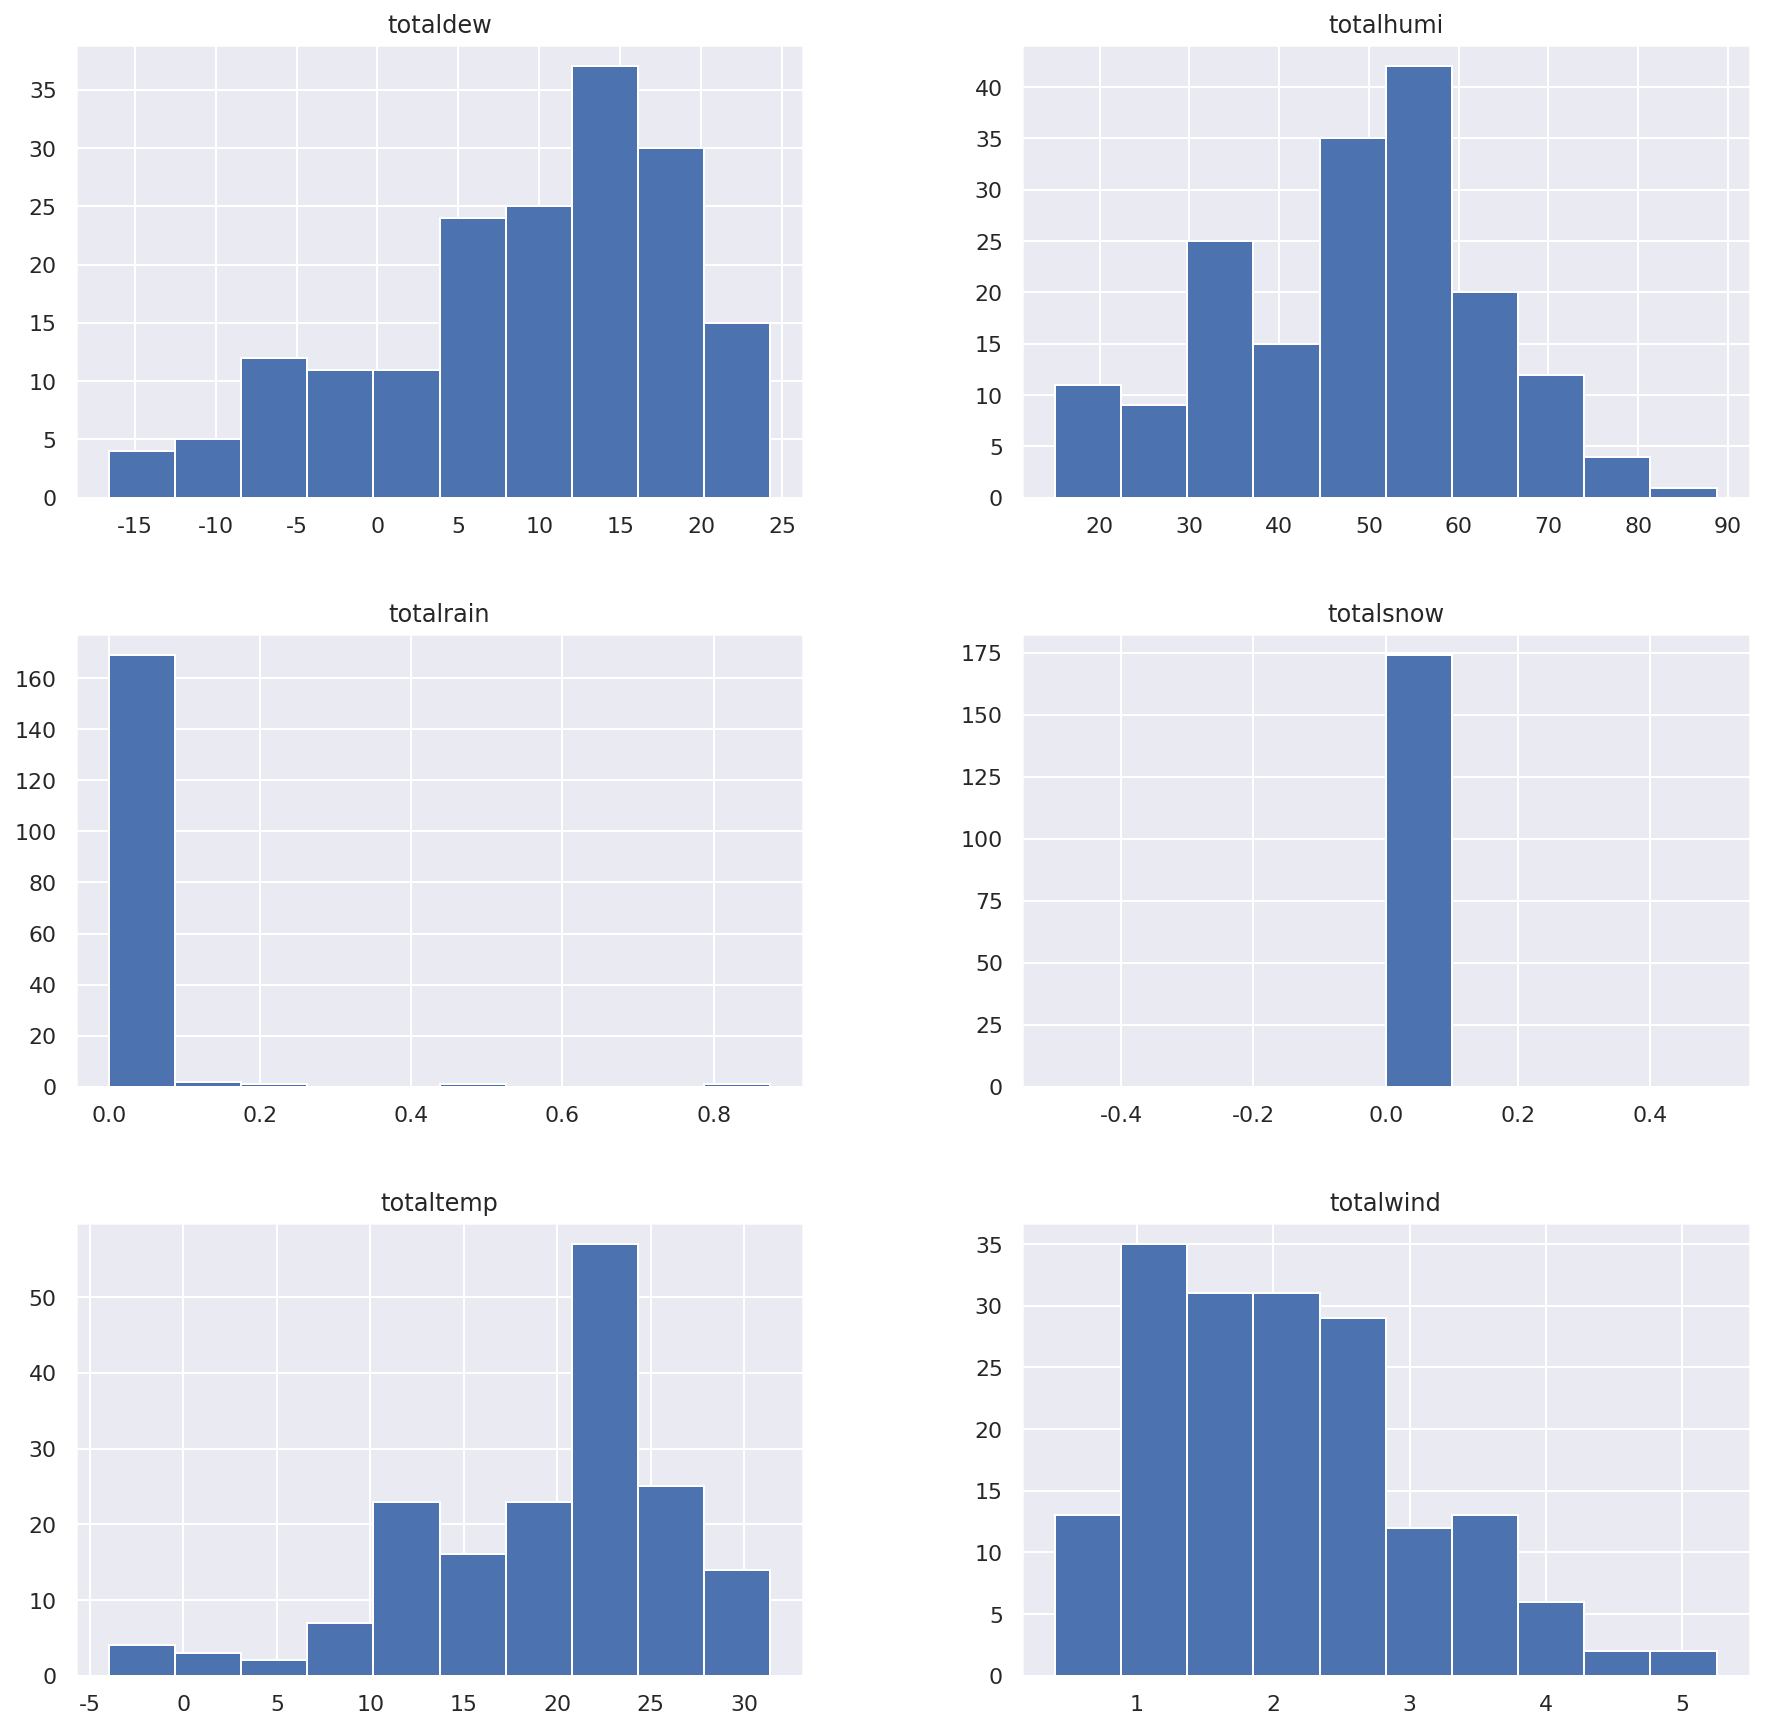

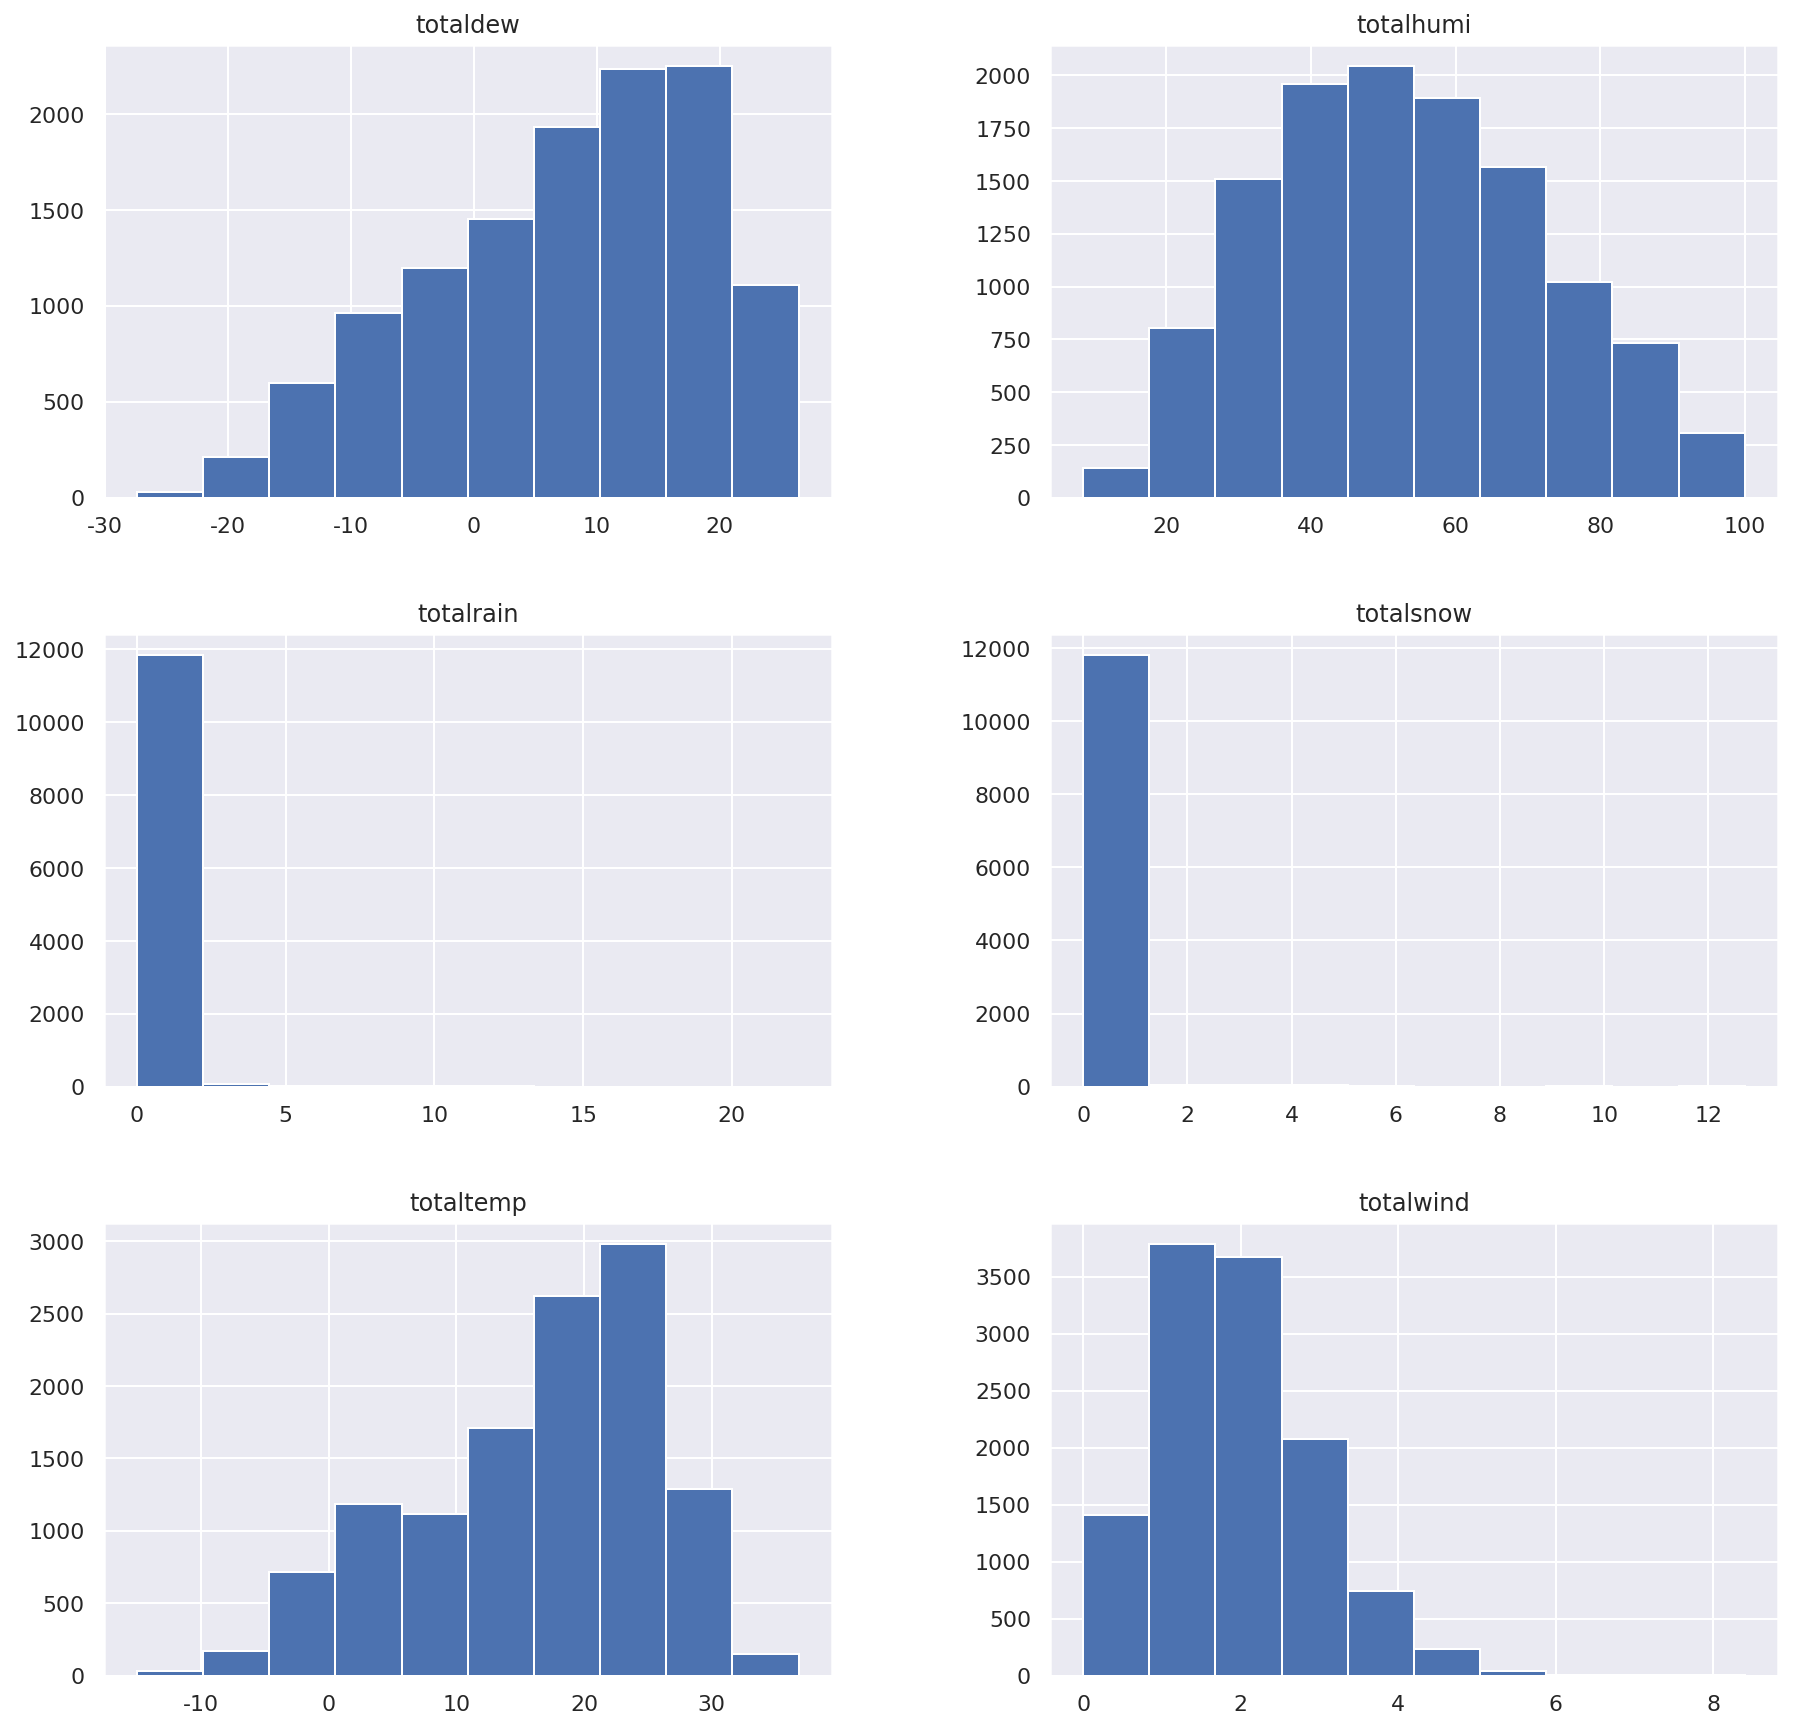

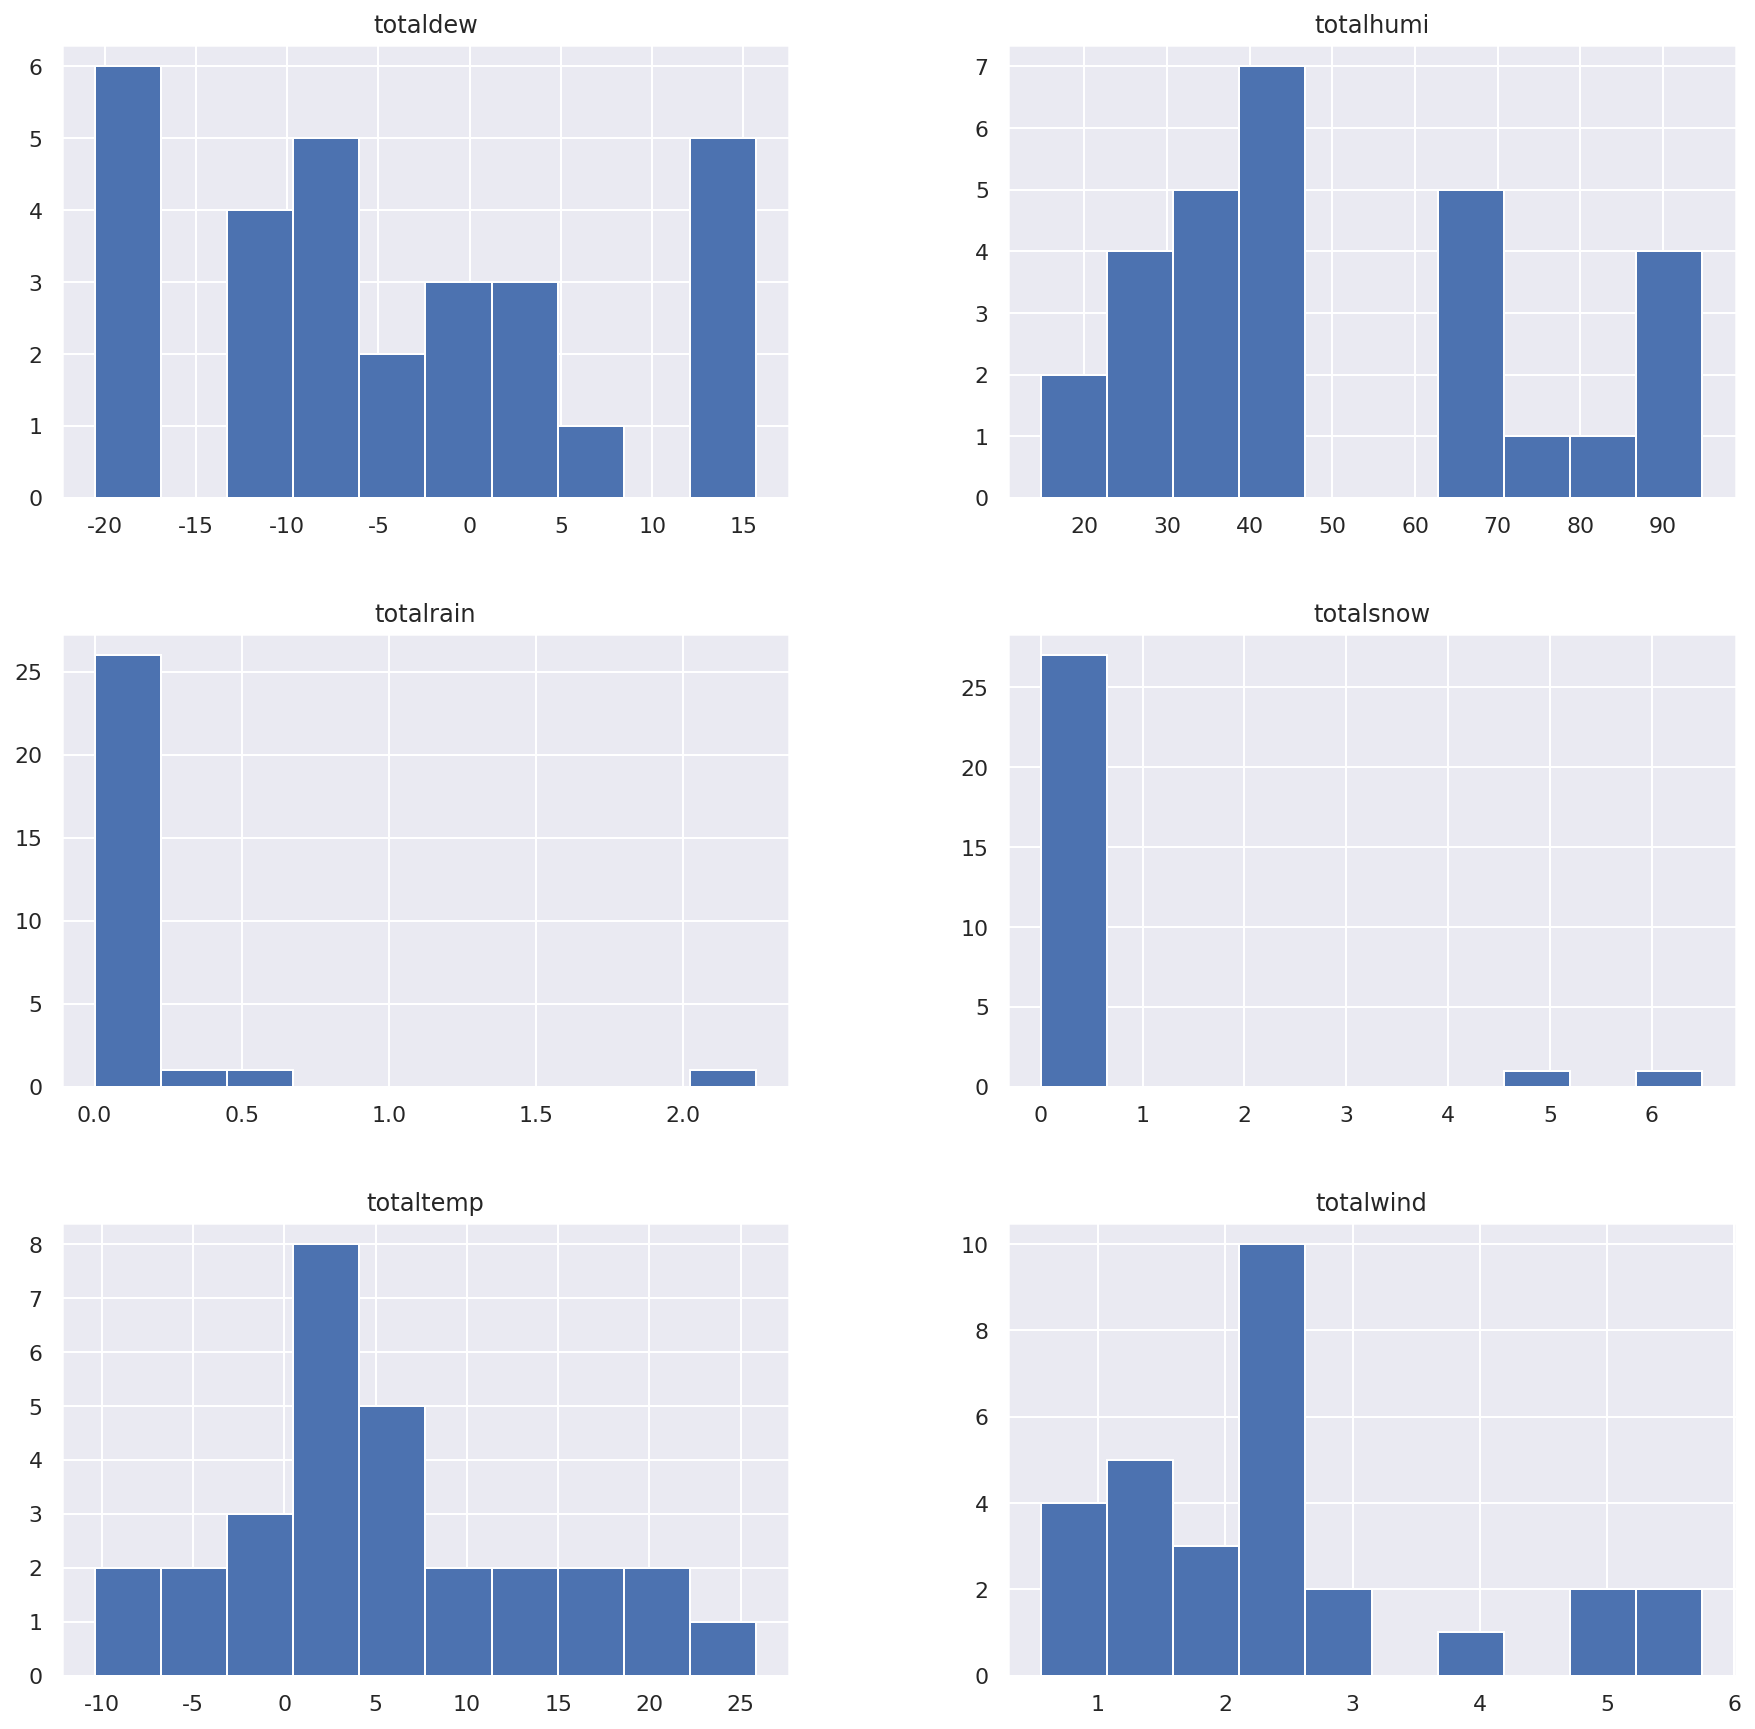

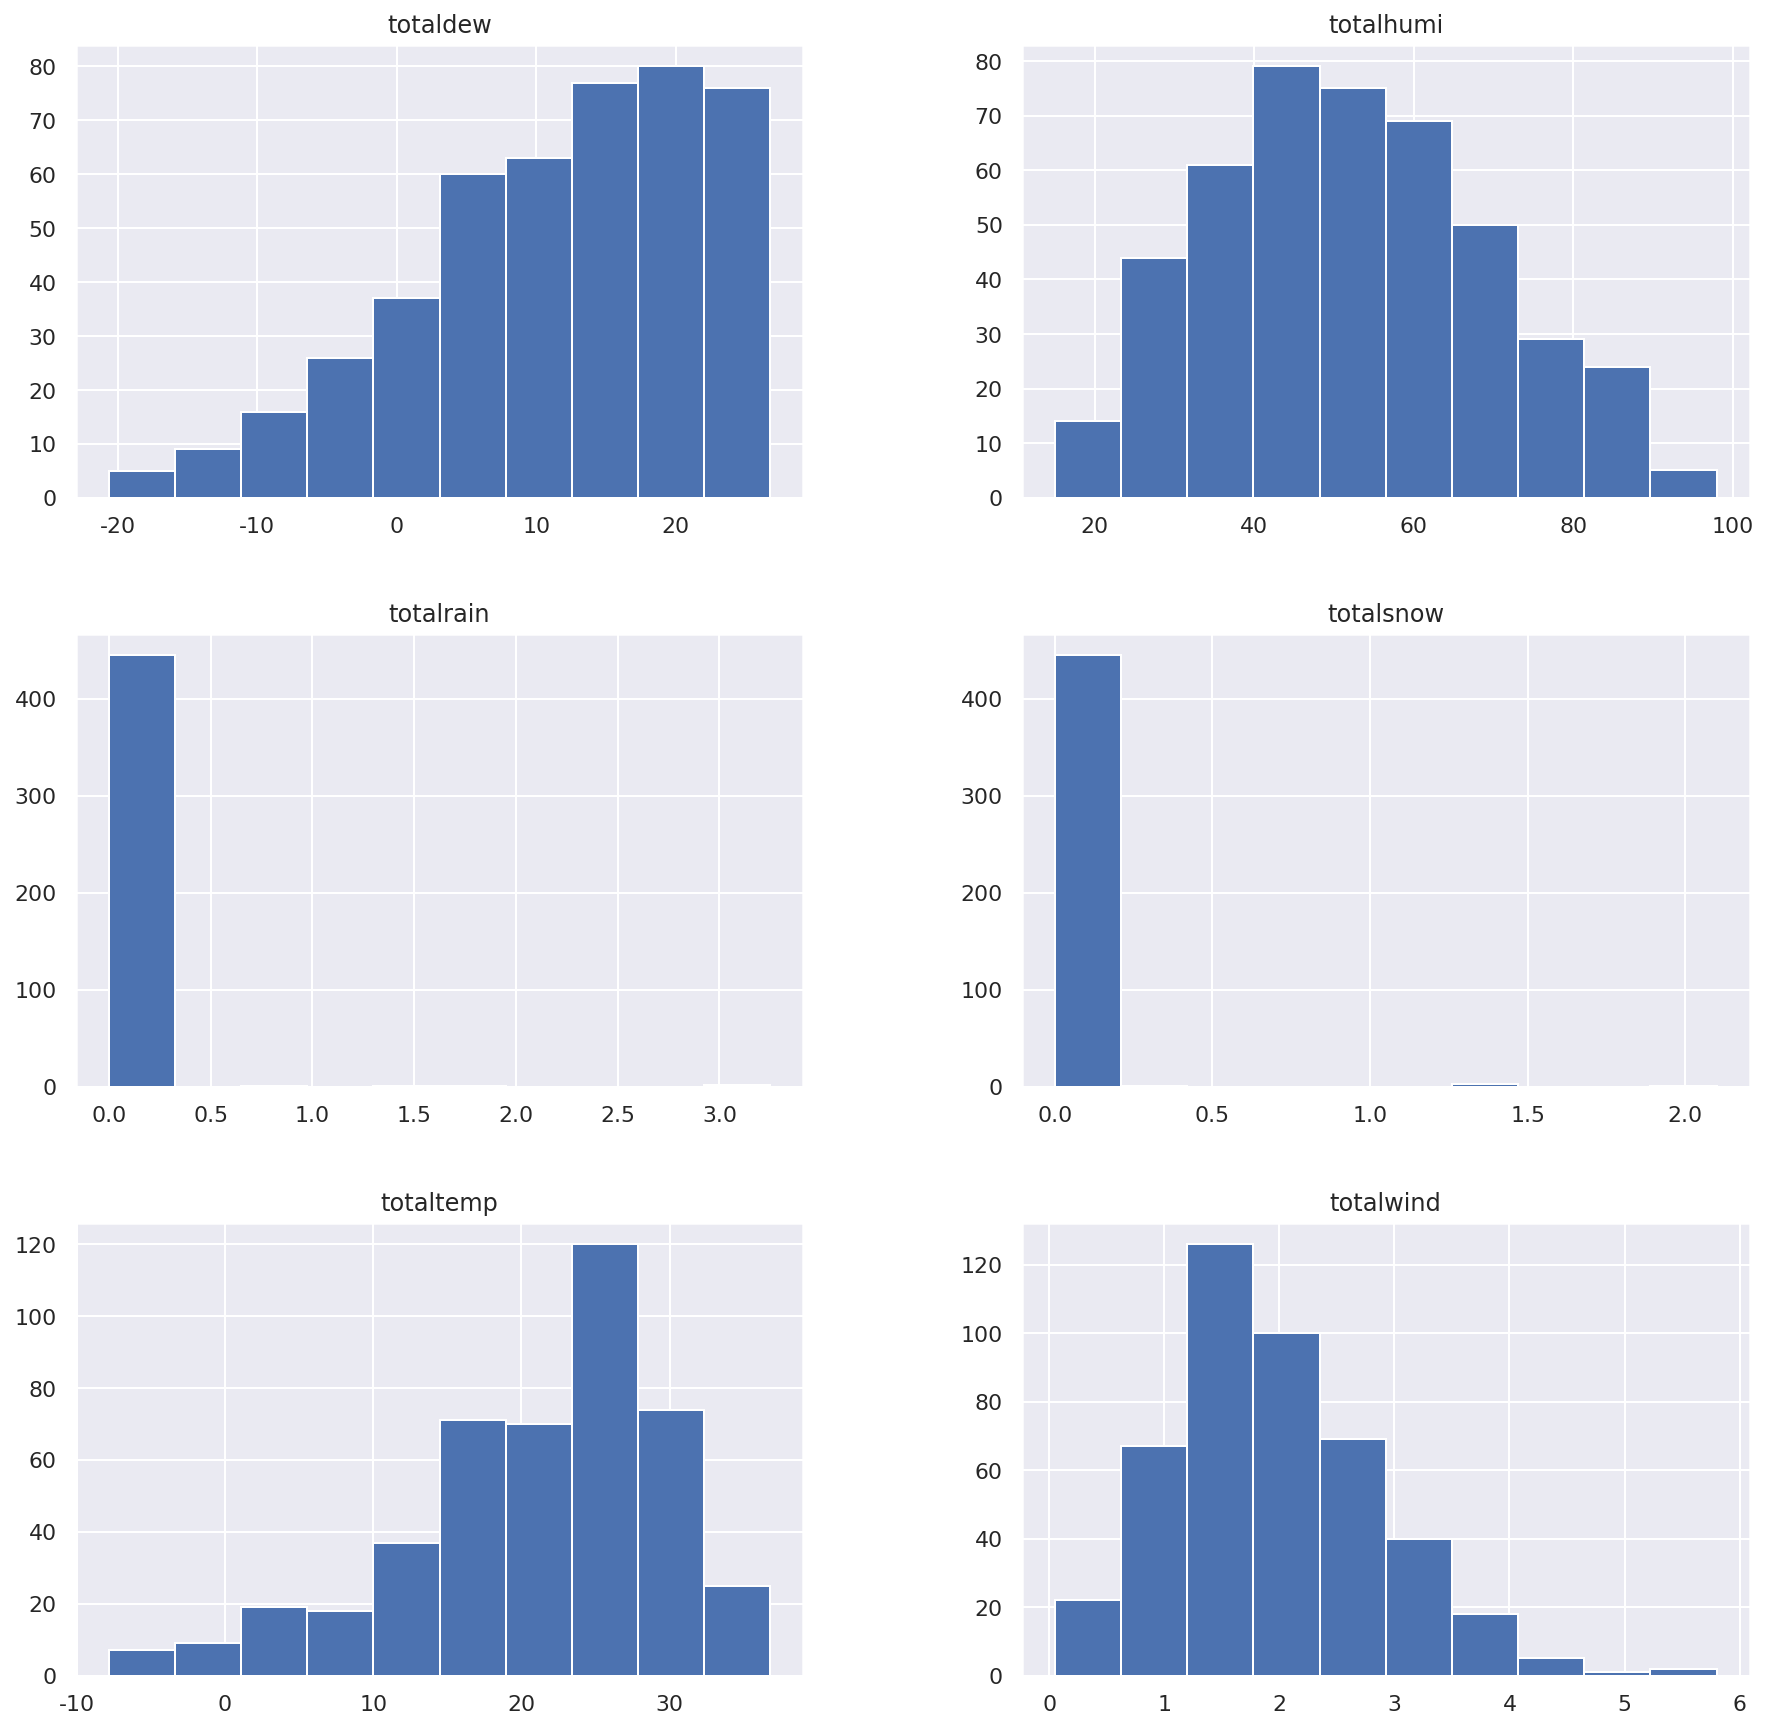

In [38]:
plt.rcParams["figure.figsize"] = (15,15)
df.groupby(['Cause']).hist()

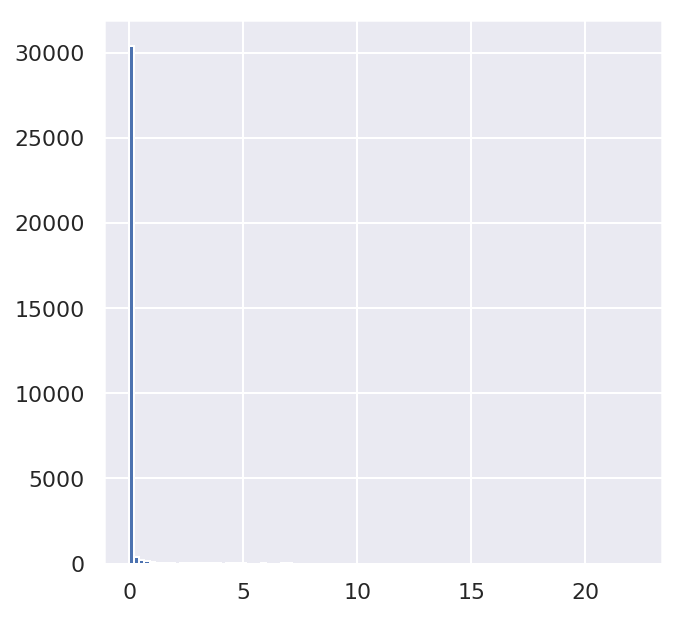

In [39]:
plt.rcParams["figure.figsize"] = (5,5)
df.totalrain.hist(bins=100)

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


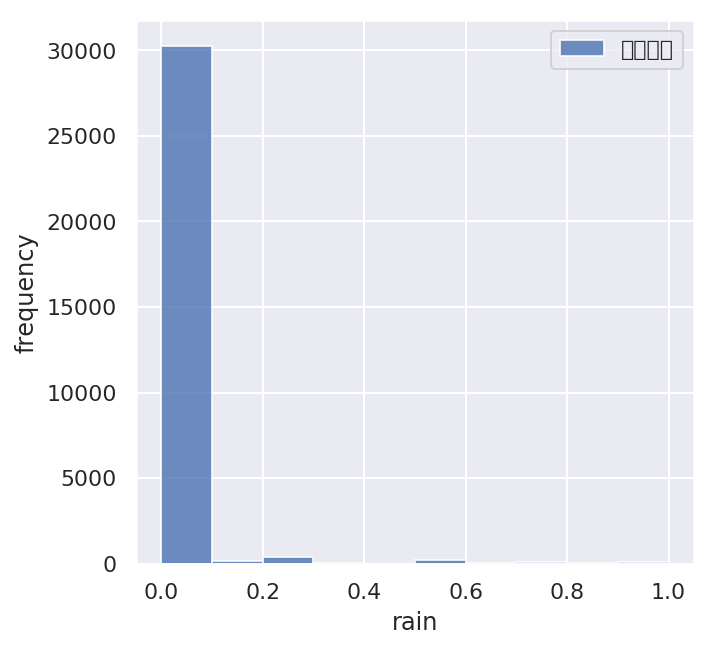

In [40]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['AppleGothic']
plt.hist(df.totalrain,bins=10,alpha = .8,range=(0,1),label='개인질환')
plt.xlabel('rain')
plt.ylabel('frequency')
plt.legend()
plt.show()
%matplotlib inline

In [41]:
rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [42]:
df.groupby(['Cause']).totalrain

In [43]:
import jupyter_core
jupyter_core.paths.jupyter_config_dir()

'/Users/lesson6_mac/.jupyter'